# МОДЕЛИРОВАНИЕ РАСПРОСТРАНЕНИЯ ВИРУСНОЙ ИНФЕКЦИИ

#### Самой простейшей является **SIR-модель** (Susceptible–Infected–Removed model), в которой каждый из индивидуумов, входящих в исследуемую популяцию, может находиться в одном из трех возможных состояний: Susceptible (потенциально восприимчивый к заражению), Infected (инфицированный), Removed (выздоровевший и невосприимчивый к заражению). Предполагается, что индивидуумы могут стать невосприимчивыми к заражению только после полного извлечения от инфекции, т.е. в какие-то моменты времени для каждого возможна последовательность переходов Susceptible - Infected - Removed.

In [ ]:
!pip install ruptures

#### Библиотеки

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
from scipy.optimize import minimize
from scipy.integrate import odeint
import pandas as pd
import matplotlib.dates as mdates
import ruptures

#### Временные параметры

In [ ]:
t_start = 0
t_end = 200
t_interval = (t_start, t_end)

#### Начальные условия

In [ ]:
S0 = 0.9  # Начальная доля восприимчивых
I0 = 0.1  # Начальная доля инфицированных
R0 = 0.0  # Начальная доля выздоровевших

### Параметры модели
#### ***beta*** - Коэффициент передачи инфекции
#### ***gamma*** - Коэффициент скорости выздоровления

In [ ]:
def SIR_model(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

In [ ]:
image_files = []
betas = np.linspace(0.05, 0.9, 20)
gammas = np.linspace(0.05, 0.9, 20)

### Решение системы (12.03.24)

In [ ]:
for beta in betas:
    for gamma in gammas:
        sol = solve_ivp(SIR_model, t_interval, [S0, I0, R0], args=(beta, gamma), t_eval=np.linspace(t_start, t_end, 1000))

        plt.figure(figsize=(12, 6))
        plt.plot(sol.t, sol.y[0], label='Восприимчивые (S)')
        plt.plot(sol.t, sol.y[1], label='Инфицированные (I)')
        plt.plot(sol.t, sol.y[2], label='Выздоровевшие (R)')
        plt.xlabel('Время')
        plt.ylabel('Доля населения')
        plt.title(f'Модель SIR (beta={beta:.2f}, gamma={gamma:.2f})')
        plt.legend()
        plt.grid(True)

        # Сохранение графика в файл
        image_filename = f'/content/SIR_beta_{beta:.2f}_gamma_{gamma:.2f}.png'
        plt.savefig(image_filename)
        plt.close()
        image_files.append(image_filename)

In [ ]:
# Создание GIF
with imageio.get_writer('/content/SIR_model_evolution.gif', mode='I', duration=1) as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)

for filename in image_files:
  os.remove(filename)

print("GIF создан и сохранен как '/content/SIR_model_evolution.gif'")

<ipython-input-8-cb37f977ad06>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF создан и сохранен как '/content/SIR_model_evolution.gif'


### Задача минимизации (19.03.24)

In [ ]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
country_data = data[data['location'] == 'Russia']
country_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
281215,RUS,Europe,Russia,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
281216,RUS,Europe,Russia,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
281217,RUS,Europe,Russia,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
281218,RUS,Europe,Russia,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
281219,RUS,Europe,Russia,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN


In [ ]:
def SIR_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

In [ ]:
def objective_function(params, initial_conditions, t, data, N):
    beta, gamma = params
    solution = odeint(SIR_model, initial_conditions, t, args=(N, beta, gamma))
    return np.sum((solution[:,1] - data)**2)

#### Временной интервал - 100 дней

In [ ]:
days_count = 100

cases = country_data['new_cases'].fillna(0).values
smoothed_cases = pd.Series(cases).rolling(window=7, center=True).mean().fillna(0)

start_index = np.where(smoothed_cases > 0)[0][0]

# Временной интервал в днях
smoothed_cases = smoothed_cases[start_index:start_index + days_count]
t = np.arange(start_index, start_index + days_count)

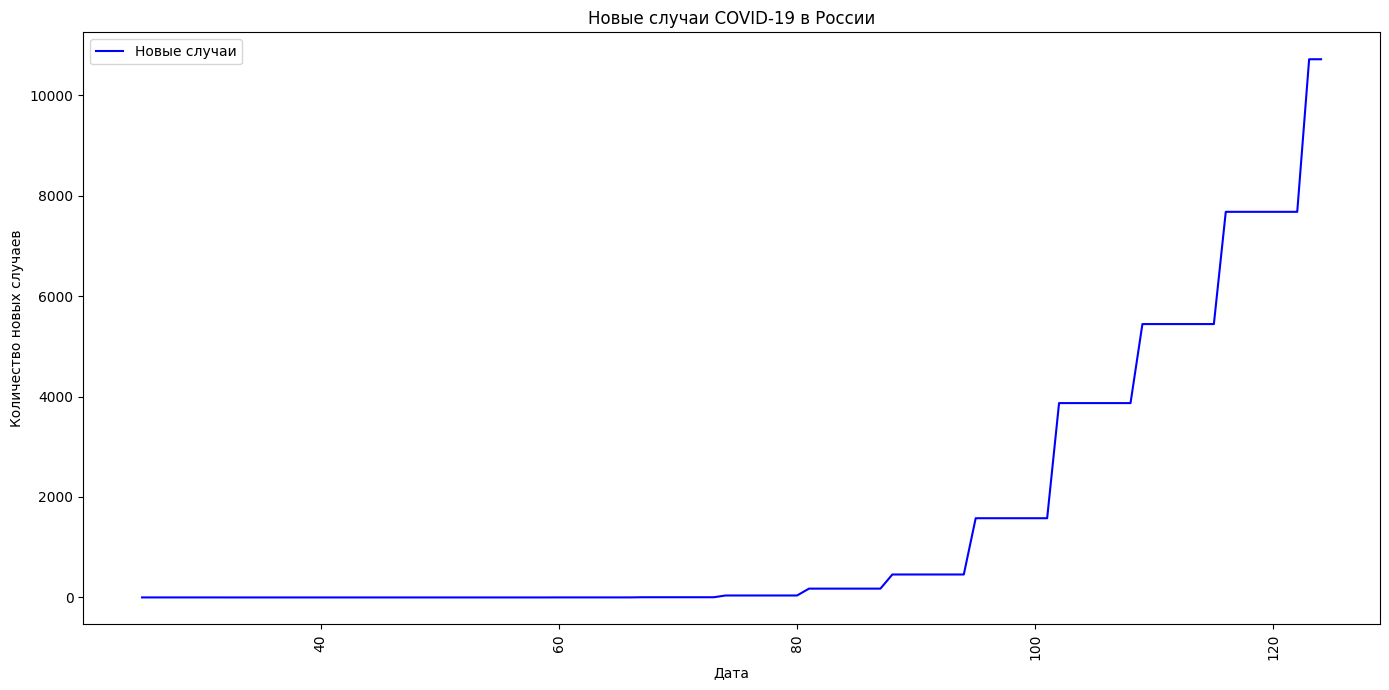

In [ ]:
# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(t, smoothed_cases, label='Новые случаи', color='blue')
plt.xticks(rotation=90)
plt.title('Новые случаи COVID-19 в России')
plt.xlabel('Дата')
plt.ylabel('Количество новых случаев')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
N = 145934462  # Население России
I0 = 100  # Начальное количество инфицированных
S0 = N - I0    # Начальное количество восприимчивых
R0 = 0         # Начальное количество выздоровевших
initial_conditions = [S0, I0, R0]

# Начальные параметры для оптимизации
initial_guess = [0.1, 0.1]

# Оптимизация
optimal = minimize(
    objective_function,
    initial_guess,
    args=(initial_conditions, t, smoothed_cases, N),
    method='L-BFGS-B',  # Используем метод, поддерживающий ограничения
    bounds=[(0.0001, 1), (0.0001, 1)]
)

print(optimal.x)

[0.14103632 0.09544451]


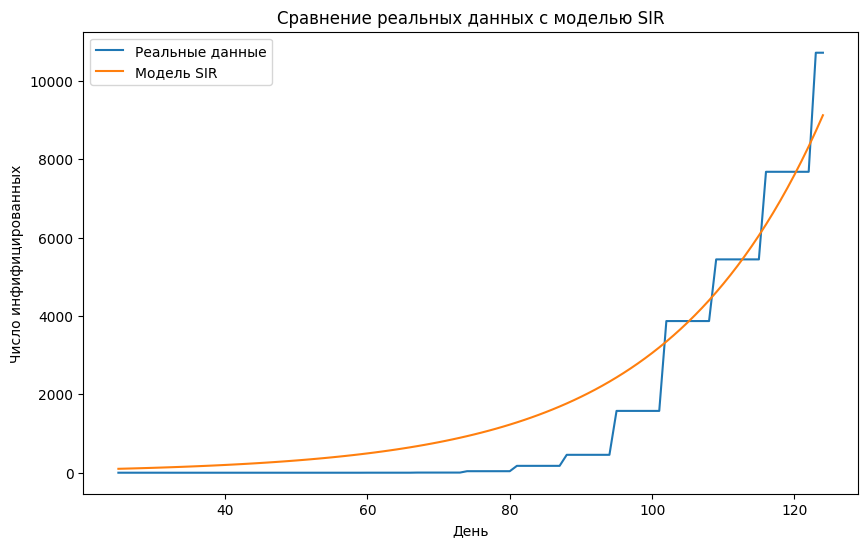

In [ ]:
beta_opt, gamma_opt = optimal.x
# Рассчет модельных значений с оптимальными параметрами
optimal_solution = odeint(SIR_model, initial_conditions, t, args=(N, beta_opt, gamma_opt))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, smoothed_cases, label='Реальные данные')
plt.plot(t, optimal_solution[:, 1], label='Модель SIR')
plt.title('Сравнение реальных данных с моделью SIR')
plt.xlabel('День')
plt.ylabel('Число инфифицированных')
plt.legend()
plt.show()

#### Временной интервал - 300 дней

In [ ]:
days_count = 300

cases = country_data['new_cases'].fillna(0).values
smoothed_cases = pd.Series(cases).rolling(window=7, center=True).mean()
start_index = np.where(smoothed_cases > 0)[0][0]

# Временной интервал в днях
smoothed_cases = smoothed_cases[start_index:start_index + days_count]
t = np.arange(start_index, start_index + days_count)

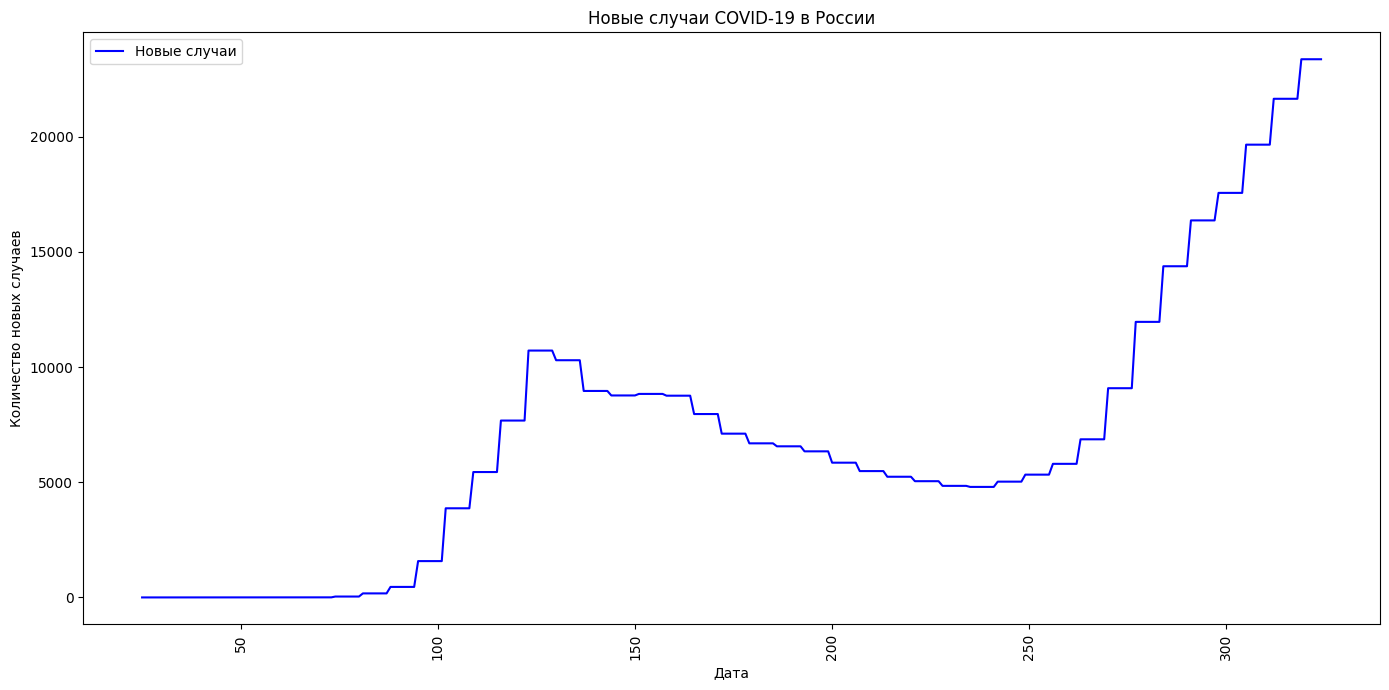

In [ ]:
# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(t, smoothed_cases, label='Новые случаи', color='blue')
plt.xticks(rotation=90)
plt.title('Новые случаи COVID-19 в России')
plt.xlabel('Дата')
plt.ylabel('Количество новых случаев')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
N = 145934462  # Население России
I0 = 100  # Начальное количество инфицированных
S0 = N - I0    # Начальное количество восприимчивых
R0 = 0         # Начальное количество выздоровевших
initial_conditions = [S0, I0, R0]

# Начальные параметры для оптимизации
initial_guess = [0.1, 0.1]

# Оптимизация
optimal = minimize(
    objective_function,
    initial_guess,
    args=(initial_conditions, t, smoothed_cases, N),
    method='L-BFGS-B',  # Используем метод, поддерживающий ограничения
    bounds=[(0.0001, 1), (0.0001, 1)]
)

print(optimal.x)

[0.11679017 0.0981363 ]


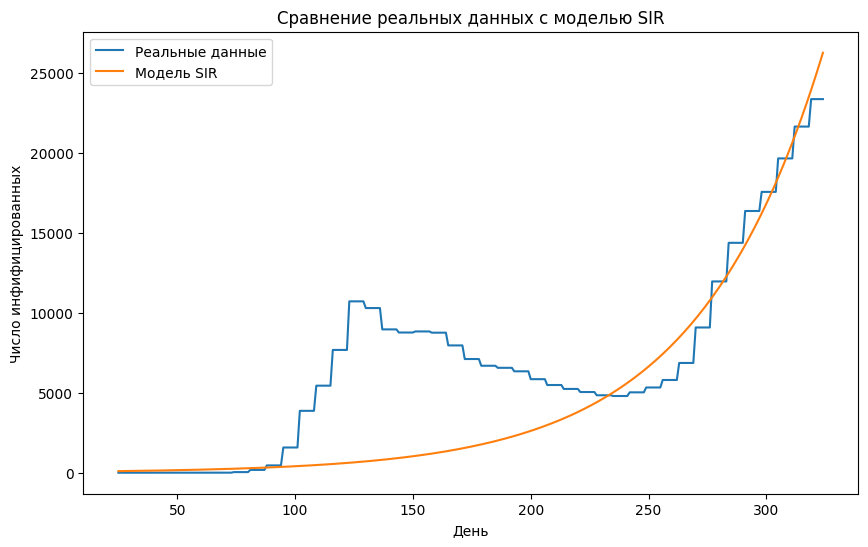

In [ ]:
beta_opt, gamma_opt = optimal.x
# Рассчет модельных значений с оптимальными параметрами
optimal_solution = odeint(SIR_model, initial_conditions, t, args=(N, beta_opt, gamma_opt))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, smoothed_cases, label='Реальные данные')
plt.plot(t, optimal_solution[:, 1], label='Модель SIR')
plt.title('Сравнение реальных данных с моделью SIR')
plt.xlabel('День')
plt.ylabel('Число инфифицированных')
plt.legend()
plt.show()

#### Временной интервал - 500 дней

[0.81497187 0.80187472]


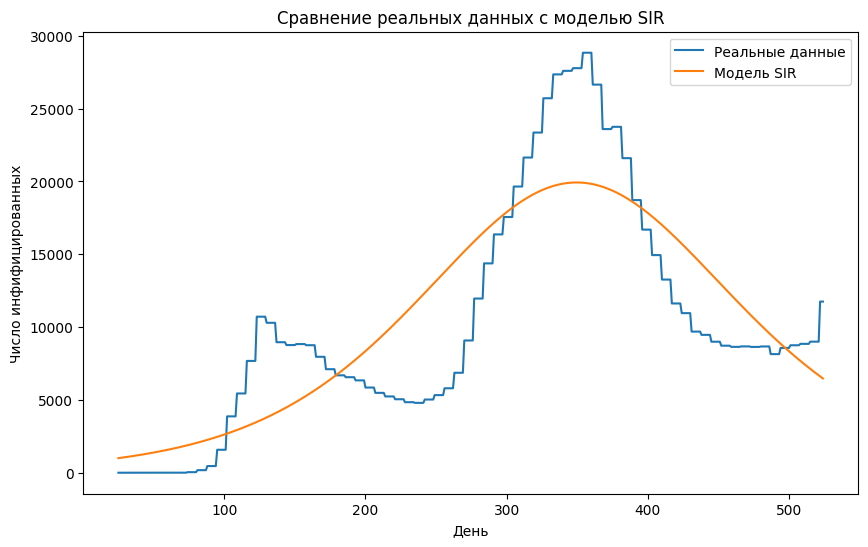

In [ ]:
days_count = 500

cases = country_data['new_cases'].fillna(0).values
smoothed_cases = pd.Series(cases).rolling(window=7, center=True).mean()
start_index = np.where(smoothed_cases > 0)[0][0]

# Временной интервал в днях
smoothed_cases = smoothed_cases[start_index:start_index + days_count]
t = np.arange(start_index, start_index + days_count)

N = 145934462  # Население России
I0 = 1000  # Начальное количество инфицированных
S0 = N - I0    # Начальное количество восприимчивых
R0 = 0         # Начальное количество выздоровевших
initial_conditions = [S0, I0, R0]

# Начальные параметры для оптимизации
initial_guess = [0.1, 0.1]

# Оптимизация
optimal = minimize(
    objective_function,
    initial_guess,
    args=(initial_conditions, t, smoothed_cases, N),
    method='L-BFGS-B',  # Используем метод, поддерживающий ограничения
    bounds=[(0.0001, 1), (0.0001, 1)]
)

print(optimal.x)

beta_opt, gamma_opt = optimal.x
# Рассчет модельных значений с оптимальными параметрами
optimal_solution = odeint(SIR_model, initial_conditions, t, args=(N, beta_opt, gamma_opt))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, smoothed_cases, label='Реальные данные')
plt.plot(t, optimal_solution[:, 1], label='Модель SIR')
plt.title('Сравнение реальных данных с моделью SIR')
plt.xlabel('День')
plt.ylabel('Число инфифицированных')
plt.legend()
plt.show()

### Задача минимизации (26.03.24)

In [ ]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
country_data = data[data['location'] == 'Russia']
country_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
281303,RUS,Europe,Russia,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
281304,RUS,Europe,Russia,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
281305,RUS,Europe,Russia,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
281306,RUS,Europe,Russia,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
281307,RUS,Europe,Russia,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN


In [ ]:
def SIR_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

In [ ]:
def objective_function(params, initial_conditions, t, data, N):
    beta, gamma = params
    solution = odeint(SIR_model, initial_conditions, t, args=(N, beta, gamma))
    return np.sum((solution[:,1] - data)**2)

#### Временной интервал - 100 дней

In [ ]:
days_count = 100

cases = country_data['new_cases_smoothed'].fillna(0).values
smoothed_cases = pd.Series(cases).rolling(window=7, center=True).mean().fillna(0)

start_index = np.where(smoothed_cases > 0)[0][0]

# Временной интервал в днях
smoothed_cases = smoothed_cases[start_index:start_index + days_count]
t = np.arange(start_index, start_index + days_count)

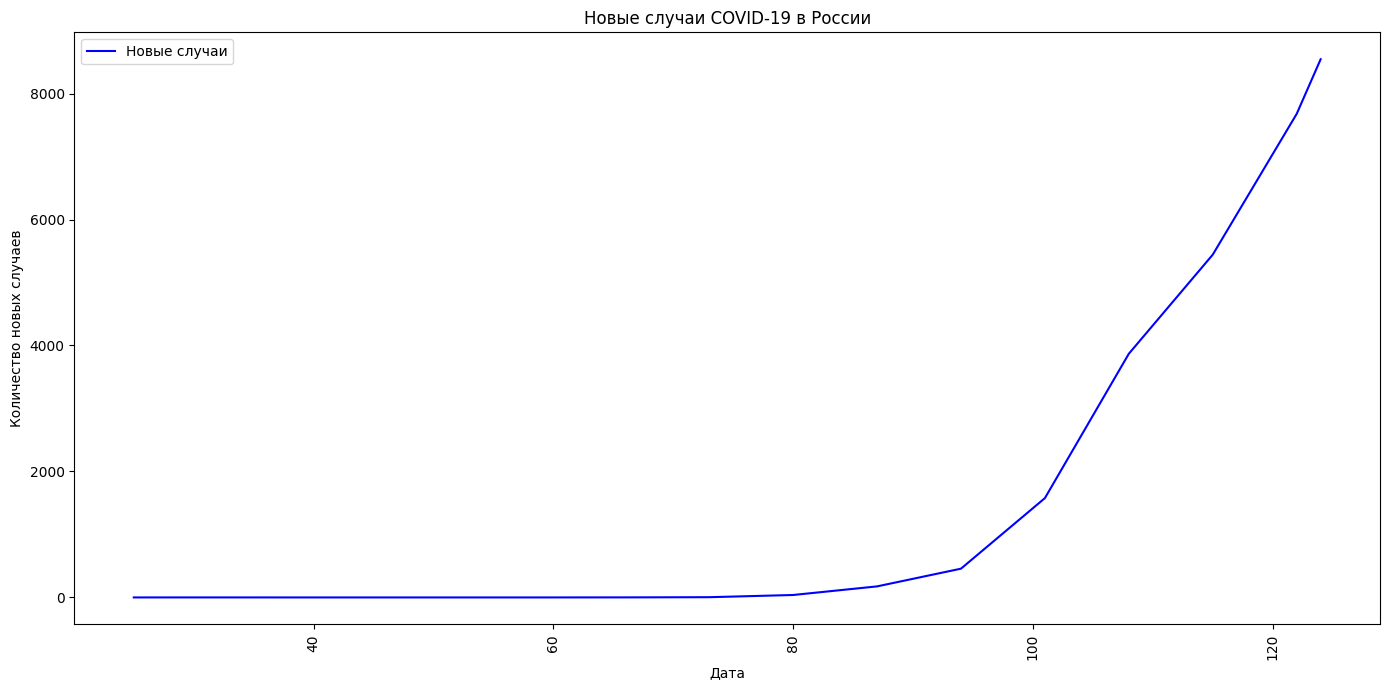

In [ ]:
# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(t, smoothed_cases, label='Новые случаи', color='blue')
plt.xticks(rotation=90)
plt.title('Новые случаи COVID-19 в России')
plt.xlabel('Дата')
plt.ylabel('Количество новых случаев')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
N = 145934462  # Население России
I0 = 10  # Начальное количество инфицированных
S0 = N - I0    # Начальное количество восприимчивых
R0 = 0         # Начальное количество выздоровевших
initial_conditions = [S0, I0, R0]

# Начальные параметры для оптимизации
initial_guess = [0.1, 0.1]

# Оптимизация
optimal = minimize(
    objective_function,
    initial_guess,
    args=(initial_conditions, t, smoothed_cases, N),
    method='L-BFGS-B',  # Используем метод, поддерживающий ограничения
    bounds=[(0.0001, 1), (0.0001, 1)]
)

print(optimal.x)

[0.16219588 0.09309626]


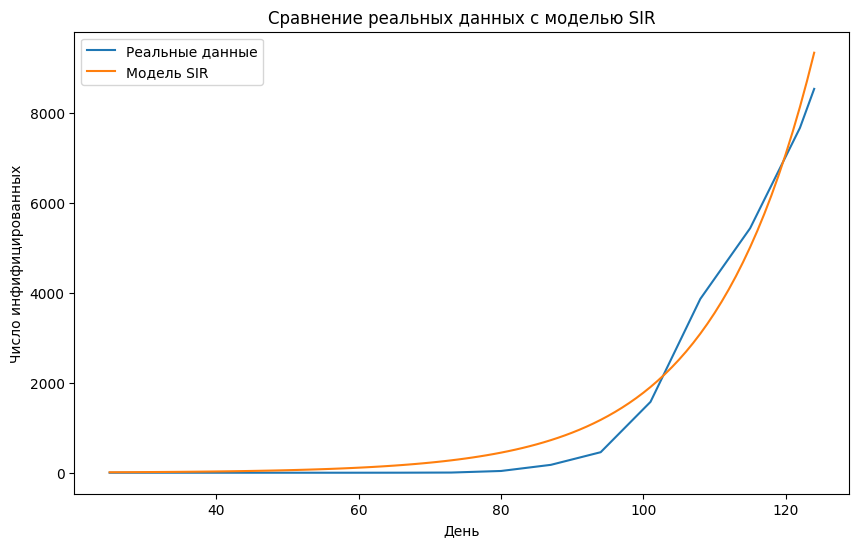

In [ ]:
beta_opt, gamma_opt = optimal.x
# Рассчет модельных значений с оптимальными параметрами
optimal_solution = odeint(SIR_model, initial_conditions, t, args=(N, beta_opt, gamma_opt))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, smoothed_cases, label='Реальные данные')
plt.plot(t, optimal_solution[:, 1], label='Модель SIR')
plt.title('Сравнение реальных данных с моделью SIR')
plt.xlabel('День')
plt.ylabel('Число инфифицированных')
plt.legend()
plt.show()

#### Временной интервал - 300 дней

In [ ]:
days_count = 300

cases = country_data['new_cases_smoothed'].fillna(0).values
smoothed_cases = pd.Series(cases).rolling(window=7, center=True).mean()
start_index = np.where(smoothed_cases > 0)[0][0]

# Временной интервал в днях
smoothed_cases = smoothed_cases[start_index:start_index + days_count]
t = np.arange(start_index, start_index + days_count)

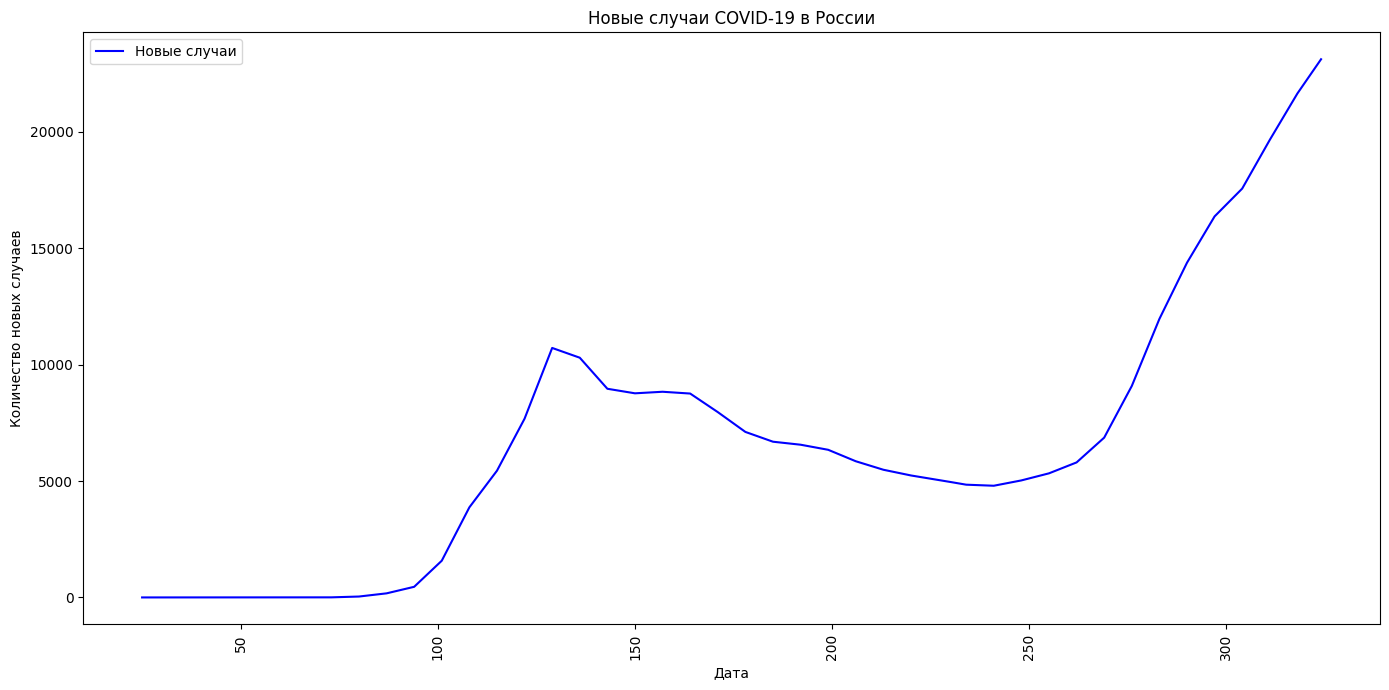

In [ ]:
# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(t, smoothed_cases, label='Новые случаи', color='blue')
plt.xticks(rotation=90)
plt.title('Новые случаи COVID-19 в России')
plt.xlabel('Дата')
plt.ylabel('Количество новых случаев')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
N = 145934462  # Население России
I0 = 100  # Начальное количество инфицированных
S0 = N - I0    # Начальное количество восприимчивых
R0 = 0         # Начальное количество выздоровевших
initial_conditions = [S0, I0, R0]

# Начальные параметры для оптимизации
initial_guess = [0.1, 0.1]

# Оптимизация
optimal = minimize(
    objective_function,
    initial_guess,
    args=(initial_conditions, t, smoothed_cases, N),
    method='L-BFGS-B',  # Используем метод, поддерживающий ограничения
    bounds=[(0.0001, 1), (0.0001, 1)]
)

print(optimal.x)

[0.11664743 0.09815214]


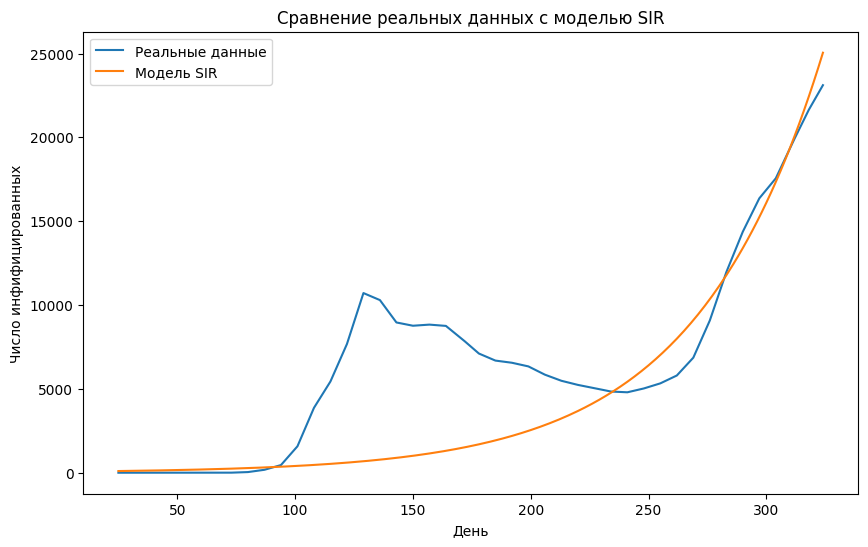

In [ ]:
beta_opt, gamma_opt = optimal.x
# Рассчет модельных значений с оптимальными параметрами
optimal_solution = odeint(SIR_model, initial_conditions, t, args=(N, beta_opt, gamma_opt))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, smoothed_cases, label='Реальные данные')
plt.plot(t, optimal_solution[:, 1], label='Модель SIR')
plt.title('Сравнение реальных данных с моделью SIR')
plt.xlabel('День')
plt.ylabel('Число инфифицированных')
plt.legend()
plt.show()

#### Временной интервал - 500 дней

[0.80983003 0.79685193]


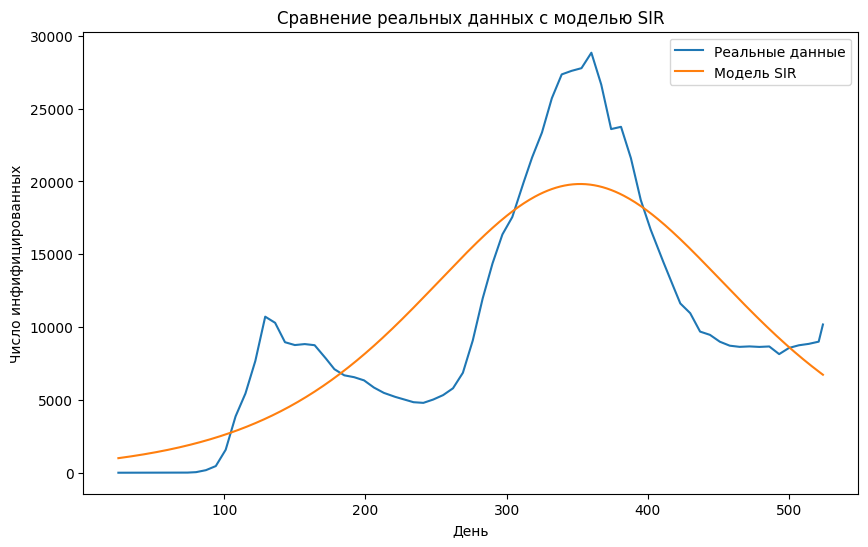

In [ ]:
days_count = 500

cases = country_data['new_cases_smoothed'].fillna(0).values
smoothed_cases = pd.Series(cases).rolling(window=7, center=True).mean()
start_index = np.where(smoothed_cases > 0)[0][0]

# Временной интервал в днях
smoothed_cases = smoothed_cases[start_index:start_index + days_count]
t = np.arange(start_index, start_index + days_count)

N = 145934462  # Население России
I0 = 1000  # Начальное количество инфицированных
S0 = N - I0    # Начальное количество восприимчивых
R0 = 0         # Начальное количество выздоровевших
initial_conditions = [S0, I0, R0]

# Начальные параметры для оптимизации
initial_guess = [0.1, 0.1]

# Оптимизация
optimal = minimize(
    objective_function,
    initial_guess,
    args=(initial_conditions, t, smoothed_cases, N),
    method='L-BFGS-B',  # Используем метод, поддерживающий ограничения
    bounds=[(0.0001, 1), (0.0001, 1)]
)

print(optimal.x)

beta_opt, gamma_opt = optimal.x
# Рассчет модельных значений с оптимальными параметрами
optimal_solution = odeint(SIR_model, initial_conditions, t, args=(N, beta_opt, gamma_opt))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, smoothed_cases, label='Реальные данные')
plt.plot(t, optimal_solution[:, 1], label='Модель SIR')
plt.title('Сравнение реальных данных с моделью SIR')
plt.xlabel('День')
plt.ylabel('Число инфифицированных')
plt.legend()
plt.show()

### Немного теории (29.03.24)

#### **Оптимизация**
Функция минимизации (minimize): Это основная функция, используемая для оптимизации. Она пытается минимизировать значение, возвращаемое функцией цели (objective_function), изменяя параметры beta и gamma.

* Начальное приближение (initial_guess): Начальные значения параметров beta и gamma, с которых начинается процесс оптимизации. Эти значения важны, так как они могут влиять на сходимость процесса к глобальному минимуму.

* Аргументы (args): Дополнительные аргументы для функции цели. В данном случае это начальные условия модели, временной ряд, данные о числе инфицированных и общее число населения N.

* Метод (method): Указывает на алгоритм оптимизации. L-BFGS-B - это метод, подходящий для задач с ограничениями на параметры. Он эффективен для больших задач и поддерживает ограничения по границам для параметров.

* Границы (bounds): Ограничения на значения параметров beta и gamma. Эти ограничения гарантируют, что параметры останутся в разумных пределах во время оптимизации.

####  **Целевая функция(objective_function)**
Эта функция вычисляет разницу между данными модели SIR и реальными данными о числе инфицированных. Цель состоит в том, чтобы минимизировать сумму квадратов этой разницы, что указывает на наилучшее соответствие модели к данным.

* Параметры (params): Параметры модели (beta, gamma), которые оптимизируются.

* Моделирование (odeint): Функция интегрирует систему обыкновенных дифференциальных уравнений (ОДУ), представляющую модель SIR, во времени с учетом начальных условий и текущих значений beta и gamma.

* Разница с реальными данными: Вычисляется как сумма квадратов разности между численным решением для группы инфицированных (I) и реальными данными о числе инфицированных.

Процесс оптимизации итеративно корректирует параметры beta и gamma, минимизируя разницу между предсказаниями модели и реальными данными, что позволяет точнее описать динамику эпидемии.

##### **L-BFGS-B**
L-BFGS-B (Limited-memory Broyden-Fletcher-Goldfarb-Shanno with Bounds) является вариацией алгоритма BFGS, предназначенного для оптимизации задач с большим количеством переменных, при этом поддерживая ограничения на эти переменные. Алгоритмы типа BFGS относятся к классу квазиньютоновских методов оптимизации, которые являются одними из самых эффективных методов для нахождения локального минимума функций без ограничений. L-BFGS-B модифицирует этот подход для работы с ограничениями по границам параметров.

Основные характеристики
* Ограничения по границам: L-BFGS-B позволяет задать минимальные и максимальные значения для каждой из оптимизируемых переменных, что практично для многих реальных задач, где параметры естественным образом ограничены.

* Ограниченная память (Limited-memory): В отличие от полного BFGS, L-BFGS-B использует только несколько последних обновлений градиента и приближения матрицы Гессе, что существенно снижает требования к памяти, особенно для задач с большим количеством переменных. Это делает его подходящим для оптимизации функций, зависящих от сотен и тысяч параметров.

* Эффективность и скорость сходимости: Как и другие квазиньютоновские методы, L-BFGS-B обеспечивает быструю сходимость к локальному минимуму, особенно если начальное приближение находится близко к оптимальному решению.

Как работает L-BFGS-B
Инициализация: Алгоритм начинается с начальной точки и инициализируется начальным приближением обратной матрицы Гессе (или её аналога, учитывающего ограниченную память).

* Вычисление градиента: На каждом шаге вычисляется градиент целевой функции в текущей точке.

* Обновление направления поиска: Используя аппроксимацию обратной матрицы Гессе и градиент, алгоритм определяет направление, в котором следует искать минимум.

* Определение шага: С помощью линейного поиска или другого метода выбора шага алгоритм определяет, насколько далеко в выбранном направлении следует переместиться.

* Обновление переменных и матрицы: После выполнения шага алгоритм обновляет текущие значения переменных и аппроксимацию обратной матрицы Гессе, учитывая новые градиенты и сделанные изменения.

* Проверка критериев остановки: Алгоритм продолжает итерации, пока не будет достигнут критерий остановки, такой как минимальное изменение функции или градиента.

#### **Какие ещё важные факторы могут влиять на модель и её соответствие реальным данным?**

1. Изменчивость вируса
* Мутации вируса: COVID-19 продемонстрировал способность к мутациям, что приводит к появлению новых штаммов с различной скоростью передачи и степенью тяжести заболевания. Это может значительно изменить динамику распространения и эффективность вакцинации.
2. Поведенческие факторы
* Соблюдение мер предосторожности: Изменение поведения людей в ответ на введение или отмену ограничений, таких как социальное дистанцирование, ношение масок и карантинные меры, может значительно повлиять на скорость распространения вируса.

* Мобильность населения: Путешествия и перемещения людей внутри страны и между странами влияют на распространение вируса, что может быть недостаточно точно учтено в базовой модели SIR.

3. Медицинские и биологические факторы
* Неоднородность населения: Население не является однородным в отношении восприимчивости к вирусу, скорости передачи и риска развития тяжелой формы заболевания. Факторы, такие как возраст, наличие сопутствующих заболеваний и социально-экономический статус, могут значительно влиять на распространение вируса.

* Иммунитет: Приобретенный иммунитет после перенесенного заболевания или вакцинации изменяется со временем, что сложно учесть в упрощенной модели. Также необходимо учитывать различную эффективность вакцин.

4. Система здравоохранения
* Тестирование и отчетность: Частота и объем тестирования на COVID-19, а также точность и полнота отчетности о случаях заболевания влияют на доступность и качество данных, на основе которых проводится моделирование.

* Нагрузка на систему здравоохранения: Способность системы здравоохранения справляться с пиковыми нагрузками также влияет на смертность и выживаемость, что должно учитываться в модели.

5. Экономические и социальные факторы
* Вакцинация: Скорость и покрытие вакцинацией значительно влияют на динамику распространения вируса. Отсутствие или неравномерность вакцинации может привести к новым волнам заболеваемости.

* Экономические и политические решения: Меры, принимаемые правительствами для сдерживания вируса или поддержки экономики, могут иметь непредсказуемые последствия для распространения инфекции.

#### Модель SEIR (Susceptible-Exposed-Infectious-Recovered)

Модель SEIR (Susceptible-Exposed-Infectious-Recovered) является расширением классической эпидемиологической модели SIR, применяемой для моделирования распространения инфекционных болезней. Эта модель вводит дополнительный компартмент "Exposed" (E) для индивидуумов, которые были инфицированы, но ещё не заразны, т.е., находятся в инкубационном периоде. Это позволяет более точно отразить динамику распространения инфекций с явно выраженным инкубационным периодом, таких как COVID-19.

### Параметры модели SEIR:

- **Susceptible (S)**: Восприимчивые к инфекции индивидуумы, которые могут быть инфицированы при контакте с инфекционными лицами.
- **Exposed (E)**: Индивидуумы, которые были инфицированы и находятся в инкубационном периоде. Они ещё не заразны для других.
- **Infectious (I)**: Заразные индивидуумы, способные передавать инфекцию восприимчивым лицам.
- **Recovered (R)**: Лица, выздоровевшие после инфекции и приобретшие иммунитет. Предполагается, что они больше не восприимчивы к инфекции и не могут её передавать.

### Применение модели SEIR:

Модель SEIR может быть использована для анализа динамики эпидемий, прогнозирования пиков заболеваемости и оценки воздействия различных мер контроля, таких как вакцинация, карантин, ограничения на перемещение и социальное дистанцирование. Дополнительные модификации модели могут включать разделение на возрастные группы, учет географического распределения или вариации в передаче инфекции, чтобы обеспечить более точное мод

In [ ]:
t_start = 0
t_end = 200
t_interval = (t_start, t_end)

In [ ]:
S0 = 0.9  # Начальная доля восприимчивых
I0 = 0.0  # Начальная доля инфицированных
R0 = 0.0  # Начальная доля выздоровевших
E0 = 0.1  # Начальная доля индивидов, которые болеют, но не заразны и со временем полностью заболеют

### Параметры модели
#### ***beta*** - Коэффициент передачи инфекции
#### **sigma** — Коэффициент перехода из состояния "Exposed" в "Infectious". Обратная величина среднего инкубационного периода
#### ***gamma*** - Коэффициент скорости выздоровления

In [ ]:
def SEIR_model(t, y, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I
    dEdt = beta * S * I - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

In [ ]:
image_files = []
betas = np.linspace(0.05, 0.9, 5)
sigmas = np.linspace(0.05, 0.9, 5)
gammas = np.linspace(0.05, 0.9, 5)

In [ ]:
for beta in betas:
    for sigma in sigmas:
        for gamma in gammas:
            sol = solve_ivp(SEIR_model, t_interval, [S0, E0, I0, R0], args=(beta, sigma, gamma), t_eval=np.linspace(t_start, t_end, 1000))

            plt.figure(figsize=(12, 6))
            plt.plot(sol.t, sol.y[0], label='Восприимчивые (S)')
            plt.plot(sol.t, sol.y[1], label='Инкубаторы (E)')
            plt.plot(sol.t, sol.y[2], label='Инфекционные (I)')
            plt.plot(sol.t, sol.y[3], label='Выздоровевшие (R)')
            plt.xlabel('Время')
            plt.ylabel('Доля населения')
            plt.title(f'Mодель SEIR (beta={beta:.2f}, sigma={sigma:.2f}, gamma={gamma:.2f})')
            plt.legend()
            plt.grid(True)

            # Сохранение графика в файл
            image_filename = f'SEIR_beta_{beta:.2f}_sigma_{sigma:.2f}_gamma_{gamma:.2f}.png'
            plt.savefig(image_filename)
            plt.close()
            image_files.append(image_filename)

In [ ]:
# Создание GIF
with imageio.get_writer('SEIR_model_evolution.gif', mode='I', duration=1) as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)

# Удаление временных файлов
for filename in image_files:
    os.remove(filename)

print("GIF создан и сохранен как 'SEIR_model_evolution.gif'")

<ipython-input-14-ddb93ac95496>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF создан и сохранен как 'SEIR_model_evolution.gif'


### Задача минимизации с применением SEIR

In [ ]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
country_data = data[data['location'] == 'Russia']

In [ ]:
def SEIR_model(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [ ]:
def objective_function_SEIR(params, initial_conditions, t, real_data, N):
    beta, sigma, gamma = params
    solution = odeint(SEIR_model, initial_conditions, t, args=(N, beta, sigma, gamma))
    return np.sum((solution[:, 2] - real_data)**2)

[1.         0.03773842 0.33530329]


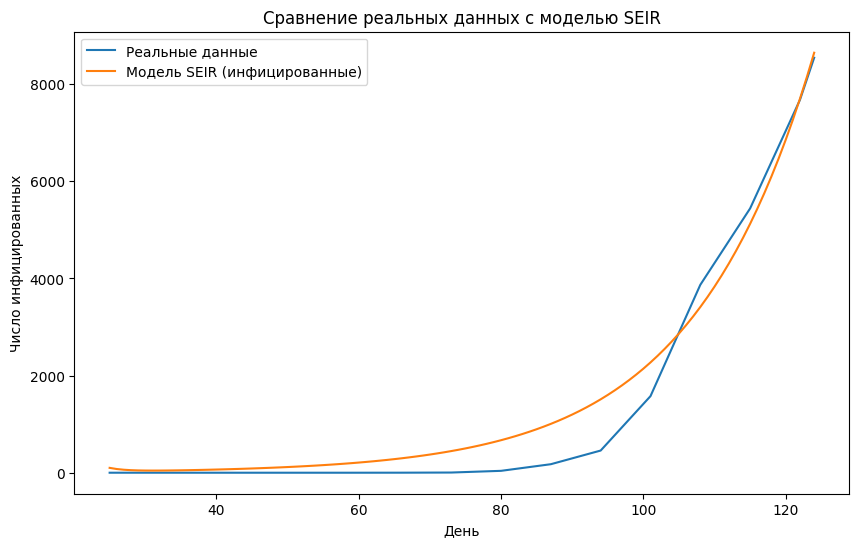

In [ ]:
days_count = 100

cases = country_data['new_cases_smoothed'].fillna(0).values
smoothed_cases = pd.Series(cases).rolling(window=7, center=True).mean().fillna(0)

start_index = np.where(smoothed_cases > 0)[0][0]

# Временной интервал в днях
smoothed_cases = smoothed_cases[start_index:start_index + days_count]
t = np.arange(start_index, start_index + days_count)

N = 145934462  # Население России
I0 = 100  # Начальное количество инфицированных
E0 = 100
S0 = N - E0 - I0   # Начальное количество восприимчивых
R0 = 0         # Начальное количество выздоровевших
initial_conditions_SEIR = [S0, E0, I0, R0]

initial_guess_SEIR = [0.1, 0.33, 0.1]  # Добавлен sigma как начальное предположение

optimal_SEIR = minimize(
    objective_function_SEIR,
    initial_guess_SEIR,
    args=(initial_conditions_SEIR, t, smoothed_cases.values, N),
    method='L-BFGS-B',
    bounds=[(0.0001, 1), (0.0001, 1), (0.0001, 1)]
)

print(optimal_SEIR.x)

beta_opt, sigma_opt, gamma_opt = optimal_SEIR.x
# Рассчет модельных значений с оптимальными параметрами
optimal_solution_SEIR = odeint(SEIR_model, initial_conditions_SEIR, t, args=(N, beta_opt, sigma_opt, gamma_opt))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, smoothed_cases, label='Реальные данные')
plt.plot(t, optimal_solution_SEIR[:, 2], label='Модель SEIR (инфицированные)')
plt.title('Сравнение реальных данных с моделью SEIR')
plt.xlabel('День')
plt.ylabel('Число инфицированных')
plt.legend()
plt.show()

### Дополнительно

In [ ]:
# Функция для описания изменений в системе
def model(y, t, phi, mu, c_0, beta, theta, eta, gamma_I, gamma_A, gamma_H, d, epsilon, q_1, q_2, q_3, sigma):
    S, E, I, A, Si, Q, H, R, Rh, D, T = y
    N = S + E + I + A + Si + Q + H + R + Rh + D + T

    dSdt = -beta * c_0 * (I + epsilon * A) * S / N - q_3 * (q_2 * I + eta * Q) * S / N + mu * Si
    dEdt = beta * c_0 * (I + epsilon * A) * S / N - phi * E - q_3 * (q_2 * I + eta * Q) * E / N
    dIdt = phi * E - gamma_I * I - d * I - q_2 * I - q_3 * (q_2 * I + eta * Q) * I / N
    dAdt = (1 - theta) * phi * E - gamma_A * A - q_3 * (q_2 * I + eta * Q) * A / N
    dSidt = q_3 * (q_2 * I + eta * Q) * S / N - mu * Si
    dQdt = q_3 * (q_2 * I + eta * Q) * (E + I + A) / N - eta * Q
    dHdt = q_2 * I + eta * Q - d * H - gamma_H * H
    dRdt = gamma_I * I + gamma_A * A + gamma_H * H
    dRhdt = gamma_H * H
    dDdt = d * (I + H)
    dTdt = q_2 * I + eta * Q

    return [dSdt, dEdt, dIdt, dAdt, dSidt, dQdt, dHdt, dRdt, dRhdt, dDdt, dTdt]

In [ ]:
# def objective_function(params, initial_conditions, t, real_data):
#     solution = odeint(model, initial_conditions, t, args=(*params,))
#     # # Применяем логарифмирование к данным модели и реальным данным
#     # log_solution = np.log1p(solution[:,-1])
#     # log_real_data = np.log1p(real_data)
#     # # Возвращаем сумму квадратов логарифмированных отклонений
#     # return np.sum((log_solution - log_real_data) ** 2)
#     return np.sum((solution[:,-1] - real_data) ** 2)

lambda_reg = 0.1  # Коэффициент регуляризации

def objective_function_with_regularization(params, initial_conditions, t, real_data):
    # Рассчитываем предсказания модели
    solution = odeint(model, initial_conditions, t, args=tuple(params))

    # Рассчитываем ошибку модели (например, сумму квадратов отклонений)
    model_error = np.sum((solution[:, -1] - real_data) ** 2)

    # Рассчитываем L2-штраф для параметров
    l2_penalty = lambda_reg * np.sum(np.square(params))

    # Возвращаем сумму ошибки модели и L2-штрафа
    return model_error + l2_penalty

In [ ]:
# Загрузка данных по COVID-19
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
country_data = data[data['location'] == 'Russia']

# Подготовка данных о новых случаях
cases = country_data['total_cases'].fillna(0).values
smoothed_cases = pd.Series(cases).rolling(window=7, center=True).mean().fillna(0)

# Находим индекс, с которого начинаются зарегистрированные случаи
start_index = np.where(smoothed_cases > 0)[0][0]
# Используем данные начиная с этого индекса до конца доступного периода минус последние 100 дней
smoothed_cases = smoothed_cases[start_index:-1000]  # Исключаем последние 100 дней
# Временной интервал в днях для анализируемого периода
t = np.arange(0, len(smoothed_cases))

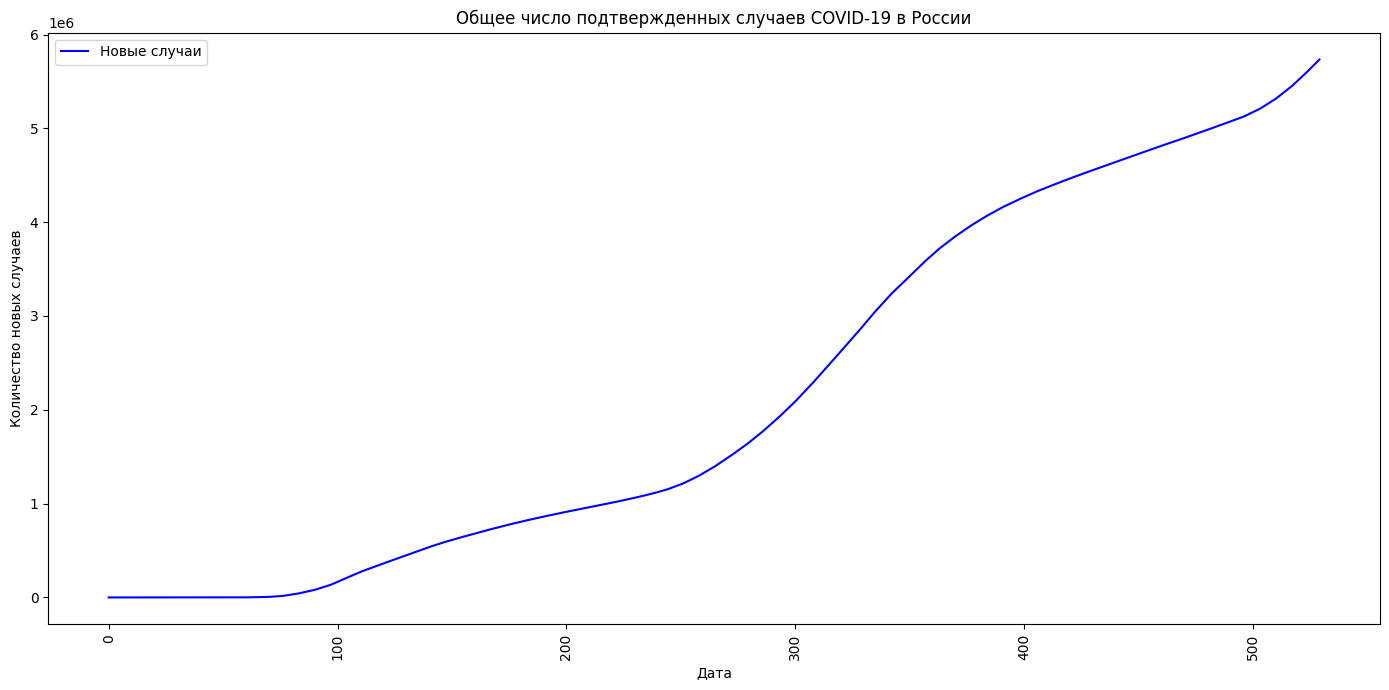

In [ ]:
# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(t, smoothed_cases, label='Новые случаи', color='blue')
plt.xticks(rotation=90)
plt.title('Общее число подтвержденных случаев COVID-19 в России')
plt.xlabel('Дата')
plt.ylabel('Количество новых случаев')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def calculate_r_squared(real_data, predicted_data):
    ss_res = np.sum((real_data - predicted_data) ** 2)
    ss_tot = np.sum((real_data - np.mean(real_data)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

def calculate_rmse(real_data, predicted_data):
    mse = np.mean((real_data - predicted_data) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [ ]:
N = country_data['population'].iloc[0]  # Общее население
initial_conditions = [
    N,          # S(t) - Уязвимые
    5000,          # E(t) - Зараженные в стадии инкубационного периода
    3000,          # I(t) - Симптомные больные
    2000,          # A(t) - Бессимптомные больные
    0,          # Si(t) - Изолированные уязвимые
    0,          # Q(t) - Зараженные на карантине
    0,          # H(t) - Госпитализированные зараженные
    0,          # R(t) - Выздоровевшие
    0,          # Rh(t) - Выздоровевшие из госпиталя
    0,          # D(t) - Кумулятивное число смертей в госпитале
    5000           # T(t) - Общее число подтвержденных случаев
]

# Параметры для оптимизации
initial_params = [
    (1/15 + 1/4) / 3,    # phi
    (0 + 1/6) / 3,       # mu
    (30 + 45) / 3,       # c_0
    (0.05 + 0.6) / 3,    # beta
    (0.35 + 0.8) / 3,    # theta
    (0 + 1) / 3,         # eta
    (0 + 1) / 3,         # gamma_I
    (0 + 1) / 3,         # gamma_A
    (0 + 1) / 3,         # gamma_H
    (0.001 + 0.15) / 3,  # d
    (0.6 + 0.9) / 3,     # epsilon
    (0.1 + 0.9) / 3,     # q_1
    (0.1 + 0.9) / 3,     # q_2
    (0 + 30) / 3,        # q_3
    (0 + 0.001) / 3      # sigma
]

# Определение границ для параметров
bounds = [
    (1/15, 1/4),  # phi
    (0, 1/6),     # mu
    (30, 45),     # c_0
    (0.05, 0.6),  # beta
    (0.35, 0.8),  # theta
    (0, 1),       # eta
    (0, 1),       # gamma_I
    (0, 1),       # gamma_A
    (0, 1),       # gamma_H
    (0.001, 0.15),# d
    (0.6, 0.9),   # epsilon
    (0.1, 0.9),   # q_1
    (0.1, 0.9),   # q_2
    (0, 30),      # q_3
    (0, 0.001)    # sigma
]


# Оптимизация параметров модели
result = minimize(
    objective_function_with_regularization,
    initial_params,
    args=(initial_conditions, t, smoothed_cases),
    method='L-BFGS-B',
    bounds=bounds
)

In [ ]:
# Проверяем статус сходимости
if result.success:
    # Оптимизация успешно сходится
    print("Оптимизация успешно завершена.")
    print("Окончательное значение целевой функции:", result.fun)
    print("Оптимизированные параметры:", result.x)
    print("Количество итераций:", result.nit)
else:
    # Оптимизация не сходится
    print("Оптимизация не завершилась успешно.")
    print("Причина:", result.message)

Оптимизация успешно завершена.
Окончательное значение целевой функции: 15594409244557.557
Оптимизированные параметры: [1.02303474e-01 5.34687508e-02 3.00000009e+01 6.28832463e-02
 8.00000000e-01 9.67936334e-01 1.00000000e+00 9.85459458e-01
 9.65108274e-01 1.49785829e-01 6.00000000e-01 3.33333333e-01
 7.94290743e-01 2.89400470e+01 3.33333333e-04]
Количество итераций: 53


In [ ]:
real_mean = np.mean(smoothed_cases)
real_median = np.median(smoothed_cases)
real_std = np.std(smoothed_cases)

# Оптимизированные параметры
optimized_params = result.x

# Получение результатов модели с оптимизированными параметрами
optimized_solution = odeint(model, initial_conditions, t, args=tuple(optimized_params))

# Получение данных об общем числе подтвержденных случаев из результатов модели
optimized_cases = optimized_solution[:, -1]

modeled_mean = np.mean(optimized_cases)
modeled_median = np.median(optimized_cases)
modeled_std = np.std(optimized_cases)

print(f"Моделирование: Среднее = {modeled_mean}, Медиана = {modeled_median}, Стандартное отклонение = {modeled_std}")
print(f"Реальные данные: Среднее = {real_mean}, Медиана = {real_median}, Стандартное отклонение = {real_std}")

Моделирование: Среднее = 2158572.852289847, Медиана = 1673268.994574952, Стандартное отклонение = 1937924.8094760678
Реальные данные: Среднее = 2185859.029110512, Медиана = 1392147.1428571427, Стандартное отклонение = 1920792.3712471263


In [ ]:
r_squared = calculate_r_squared(smoothed_cases, optimized_cases)
rmse = calculate_rmse(smoothed_cases, optimized_cases)

print(f"R² (Коэффициент детерминации): {r_squared}")
print(f"RMSE (Среднеквадратическая ошибка): {rmse}")

R² (Коэффициент детерминации): 0.9920249720596185
RMSE (Среднеквадратическая ошибка): 171532.54405111476


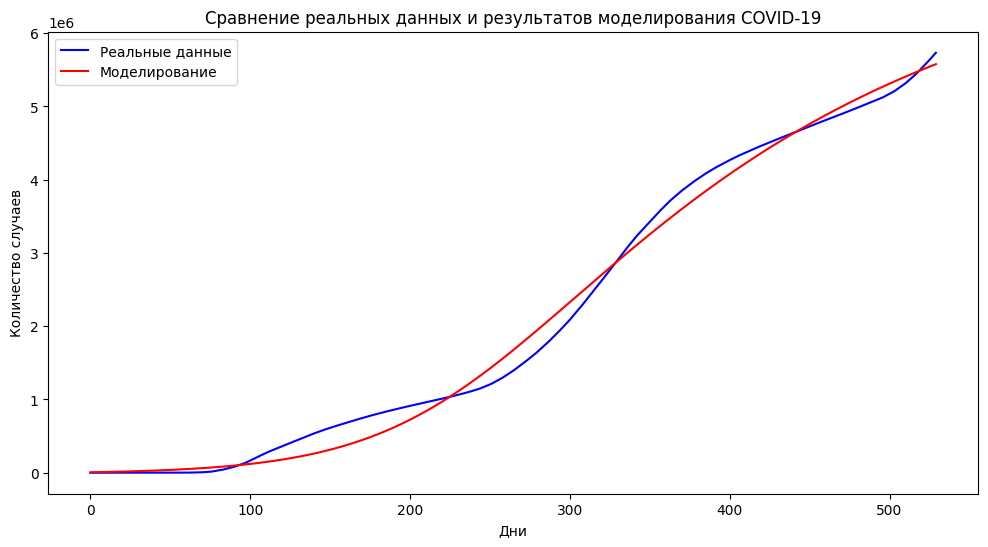

In [ ]:
# Визуализация реальных данных и данных моделирования
plt.figure(figsize=(12, 6))
plt.plot(t, smoothed_cases, 'b', label='Реальные данные')
plt.plot(t, optimized_cases, 'r', label='Моделирование')
plt.xlabel('Дни')
plt.ylabel('Количество случаев')
plt.title('Сравнение реальных данных и результатов моделирования COVID-19')
plt.legend()
plt.show()

### Аппроксимация двух пиков (02.04.2024)

In [ ]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
country_data = data[data['location'] == 'Russia']
country_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
288693,RUS,Europe,Russia,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
288694,RUS,Europe,Russia,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
288695,RUS,Europe,Russia,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
288696,RUS,Europe,Russia,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
288697,RUS,Europe,Russia,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN


In [ ]:
def SIR_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

In [ ]:
def objective_function(params, initial_conditions, t, data, N):
    beta, gamma = params
    solution = odeint(SIR_model, initial_conditions, t, args=(N, beta, gamma))
    return np.sum((solution[:,1] - data)**2)

#### Временной интервал - 200 дней

In [ ]:
days_count = 200

cases = country_data['new_cases_smoothed'].fillna(0).values
smoothed_cases = pd.Series(cases).rolling(window=7, center=True).mean().fillna(0)

start_index = np.where(smoothed_cases > 0)[0][0]

# Временной интервал в днях
smoothed_cases = smoothed_cases[start_index:start_index + days_count]
t = np.arange(start_index, start_index + days_count)

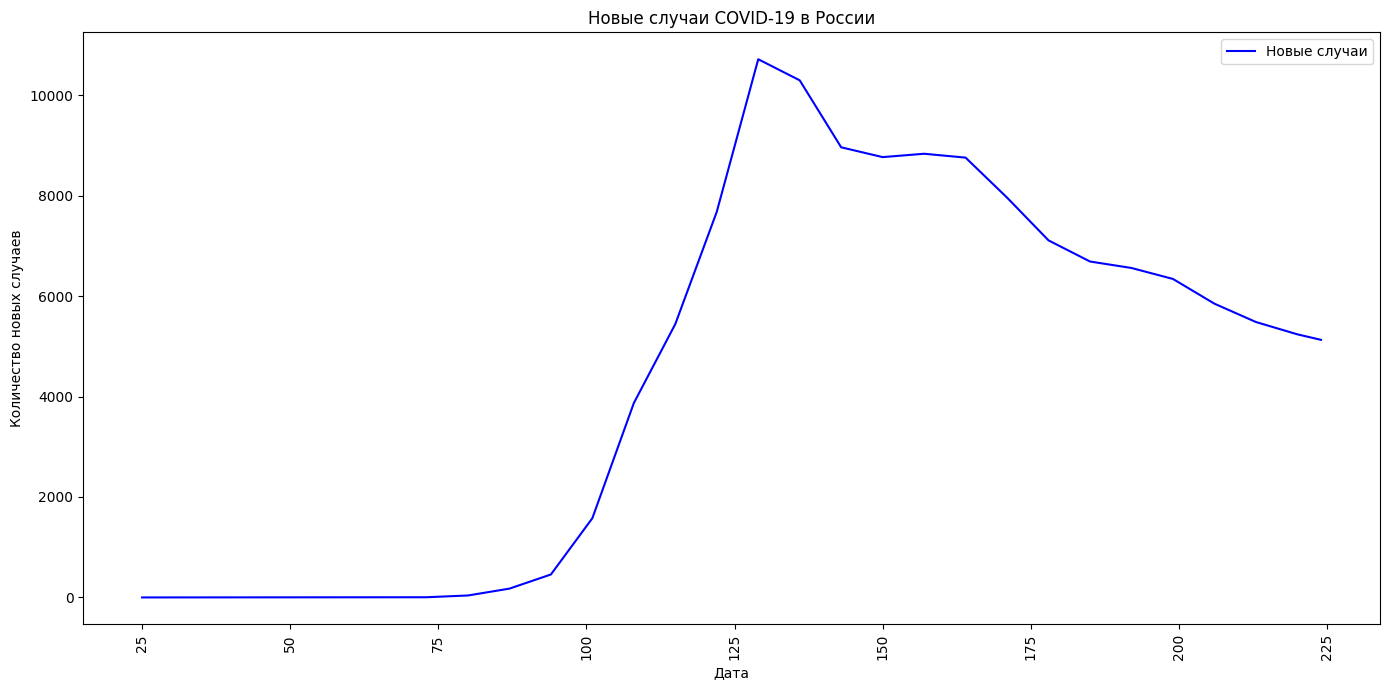

In [ ]:
# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(t, smoothed_cases, label='Новые случаи', color='blue')
plt.xticks(rotation=90)
plt.title('Новые случаи COVID-19 в России')
plt.xlabel('Дата')
plt.ylabel('Количество новых случаев')
plt.legend()
plt.tight_layout()
plt.show()

#### Перебор параметоров для пика 200 дней


In [ ]:
# N = 14593462  # Население России
N = 12500
I0 = 1 # Начальное количество инфицированных
S0 = N - I0    # Начальное количество восприимчивых
R0 = 0         # Начальное количество выздоровевших
initial_conditions = [S0, I0, R0]

# Начальные параметры для оптимизации
initial_guess = [0.1, 0.1]

# Оптимизация
optimal = minimize(
    objective_function,
    initial_guess,
    args=(initial_conditions, t, smoothed_cases, N),
    method='L-BFGS-B',  # Используем метод, поддерживающий ограничения
    bounds=[(0.0001, 1), (0.0001, 1)]
)

print(optimal.x)

[0.11375817 0.00813657]


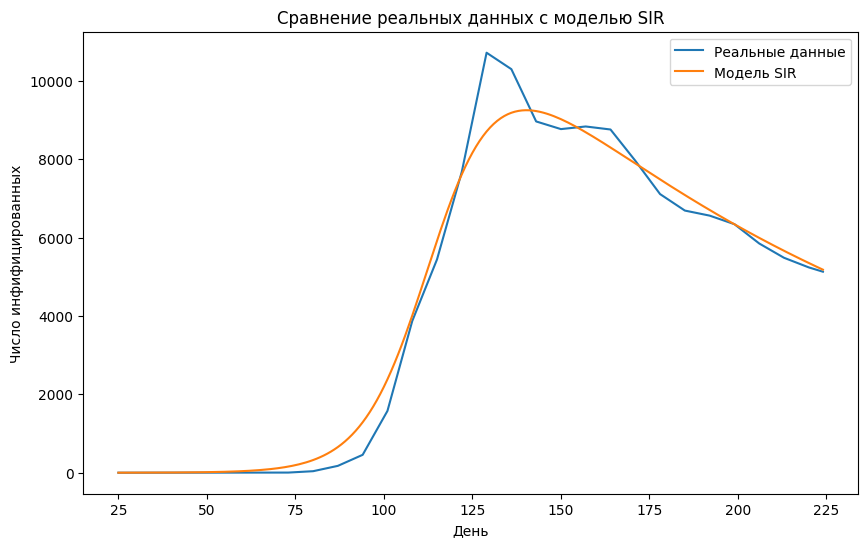

In [ ]:
beta_opt, gamma_opt = optimal.x
# Рассчет модельных значений с оптимальными параметрами
optimal_solution = odeint(SIR_model, initial_conditions, t, args=(N, beta_opt, gamma_opt))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, smoothed_cases, label='Реальные данные')
plt.plot(t, optimal_solution[:, 1], label='Модель SIR')
plt.title('Сравнение реальных данных с моделью SIR')
plt.xlabel('День')
plt.ylabel('Число инфифицированных')
plt.legend()
plt.show()

In [ ]:
# N = 14593462  # Население России
N = 18000
I0 = 1 # Начальное количество инфицированных
S0 = N - I0    # Начальное количество восприимчивых
R0 = 0         # Начальное количество выздоровевших
initial_conditions = [S0, I0, R0]

# Начальные параметры для оптимизации
initial_guess = [0.1, 0.1]

# Оптимизация
optimal = minimize(
    objective_function,
    initial_guess,
    args=(initial_conditions, t, smoothed_cases, N),
    method='L-BFGS-B',  # Используем метод, поддерживающий ограничения
    bounds=[(0.0001, 1), (0.0001, 1)]
)

print(optimal.x)

[0.11749873 0.01569229]


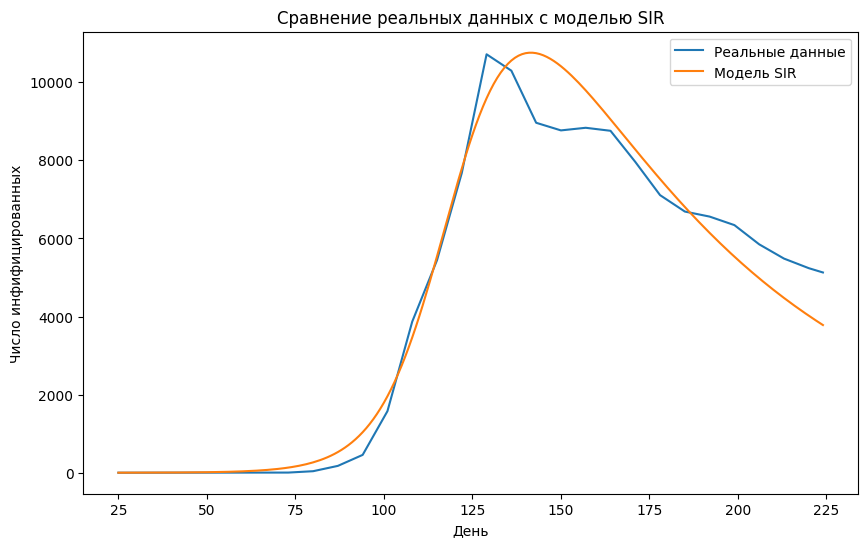

In [ ]:
beta_opt, gamma_opt = optimal.x
# Рассчет модельных значений с оптимальными параметрами
optimal_solution = odeint(SIR_model, initial_conditions, t, args=(N, beta_opt, gamma_opt))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, smoothed_cases, label='Реальные данные')
plt.plot(t, optimal_solution[:, 1], label='Модель SIR')
plt.title('Сравнение реальных данных с моделью SIR')
plt.xlabel('День')
plt.ylabel('Число инфифицированных')
plt.legend()
plt.show()

#### Временной интервал - 500 дней

In [ ]:
days_count = 500

cases = country_data['new_cases_smoothed'].fillna(0).values
smoothed_cases = pd.Series(cases).rolling(window=7, center=True).mean().fillna(0)

start_index = np.where(smoothed_cases > 0)[0][0]

# Временной интервал в днях
smoothed_cases = smoothed_cases[start_index:start_index + days_count]
t = np.arange(start_index, start_index + days_count)

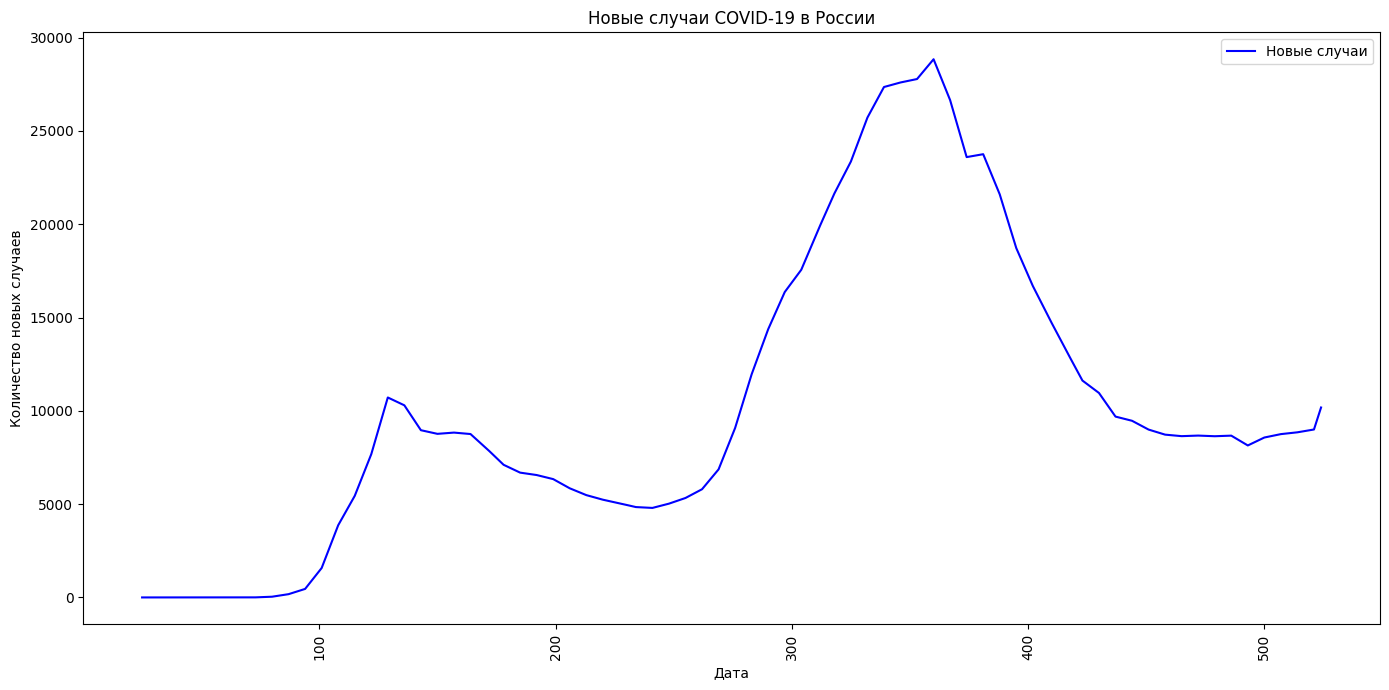

In [ ]:
# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(t, smoothed_cases, label='Новые случаи', color='blue')
plt.xticks(rotation=90)
plt.title('Новые случаи COVID-19 в России')
plt.xlabel('Дата')
plt.ylabel('Количество новых случаев')
plt.legend()
plt.tight_layout()
plt.show()

#### Перебор параметоров для пика 500 дней


In [ ]:
# N = 14593462  # Население России
N = 100000
I0 = 1 # Начальное количество инфицированных
S0 = N - I0    # Начальное количество восприимчивых
R0 = 0         # Начальное количество выздоровевших
initial_conditions = [S0, I0, R0]

# Начальные параметры для оптимизации
initial_guess = [0.1, 0.1]

# Оптимизация
optimal = minimize(
    objective_function,
    initial_guess,
    args=(initial_conditions, t, smoothed_cases, N),
    method='L-BFGS-B',  # Используем метод, поддерживающий ограничения
    bounds=[(0.0001, 1), (0.0001, 1)]
)

print(optimal.x)

[0.05895932 0.0212952 ]


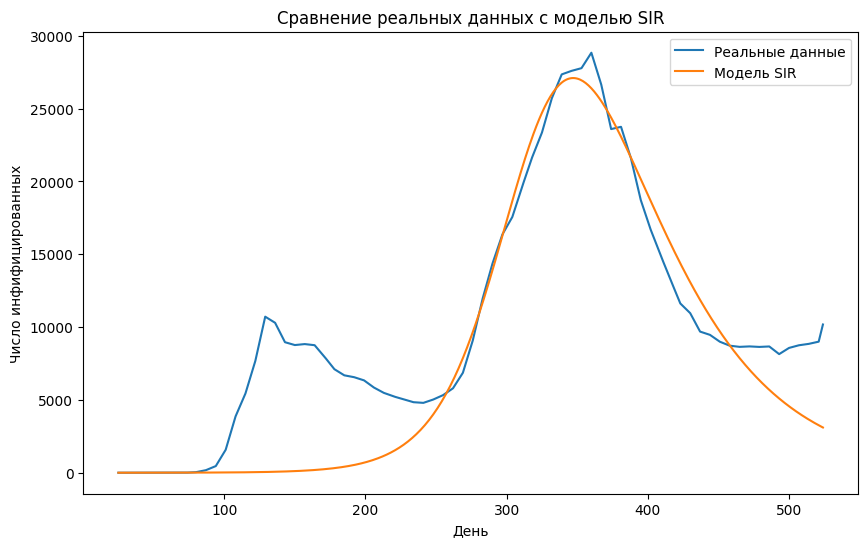

In [ ]:
beta_opt, gamma_opt = optimal.x
# Рассчет модельных значений с оптимальными параметрами
optimal_solution = odeint(SIR_model, initial_conditions, t, args=(N, beta_opt, gamma_opt))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, smoothed_cases, label='Реальные данные')
plt.plot(t, optimal_solution[:, 1], label='Модель SIR')
plt.title('Сравнение реальных данных с моделью SIR')
plt.xlabel('День')
plt.ylabel('Число инфифицированных')
plt.legend()
plt.show()

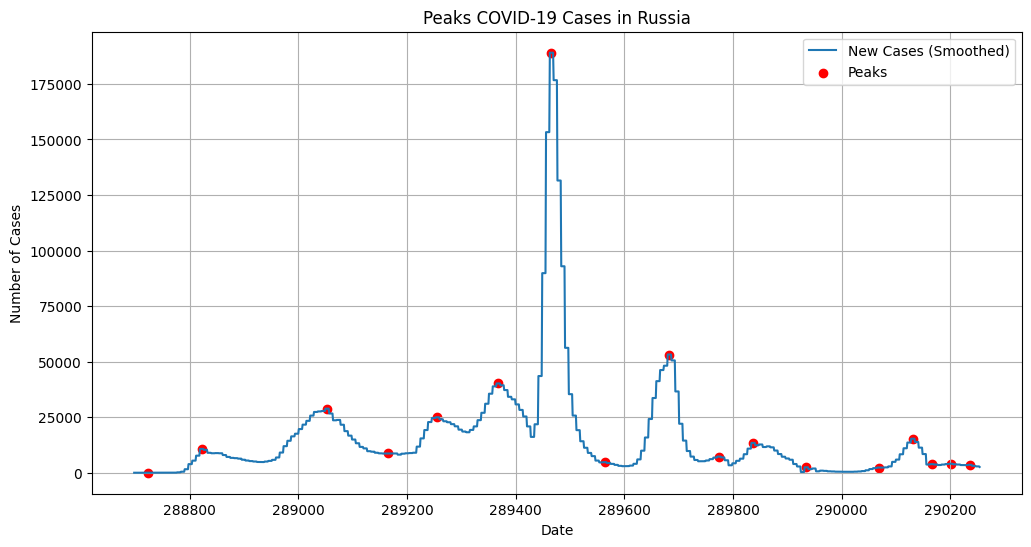

In [ ]:
from scipy.signal import find_peaks

# Предположим, что данные имеют формат, где 'new_cases_smoothed' это сглаженные новые случаи
data_series = country_data['new_cases_smoothed']
peaks, _ = find_peaks(data_series, distance=30)  # `distance` зависит от частоты данных и ожидаемой длительности волн

# Визуализация пиков
plt.figure(figsize=(12, 6))
plt.plot(data_series.index, data_series, label='New Cases (Smoothed)')
plt.scatter(data_series.index[peaks], data_series.iloc[peaks], color='red', label='Peaks')
plt.title('Peaks COVID-19 Cases in Russia')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

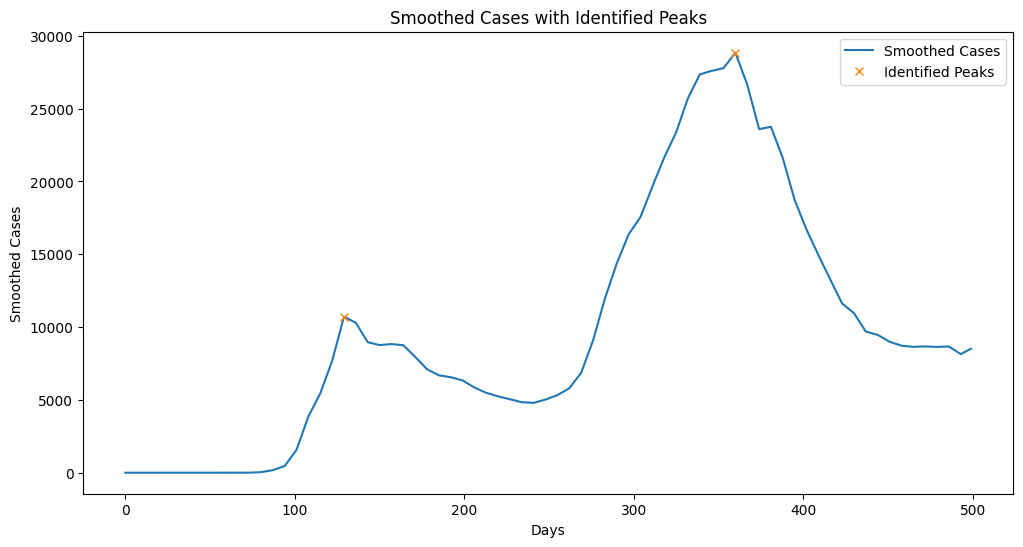

In [ ]:
from scipy.signal import find_peaks

days_count = 500

cases = country_data['new_cases_smoothed'].fillna(0).values
smoothed_cases = pd.Series(cases).rolling(window=7, center=True).mean().fillna(0)

start_index = 0

# Временной интервал в днях
smoothed_cases = smoothed_cases[start_index:start_index + days_count]
t = np.arange(start_index, start_index + days_count)

# Определение пиков в сглаженных данных о случаях заболевания
peaks, properties = find_peaks(smoothed_cases, height=np.max(smoothed_cases)/3, distance=200)

# Визуализация данных и пиков
plt.figure(figsize=(12, 6))
plt.plot(smoothed_cases, label='Smoothed Cases')
plt.plot(peaks, smoothed_cases.iloc[peaks], "x", label='Identified Peaks')
plt.title('Smoothed Cases with Identified Peaks')
plt.xlabel('Days')
plt.ylabel('Smoothed Cases')
plt.legend()
plt.show()

[0.3705483  0.31569678]
[0.12480039 0.09914877]


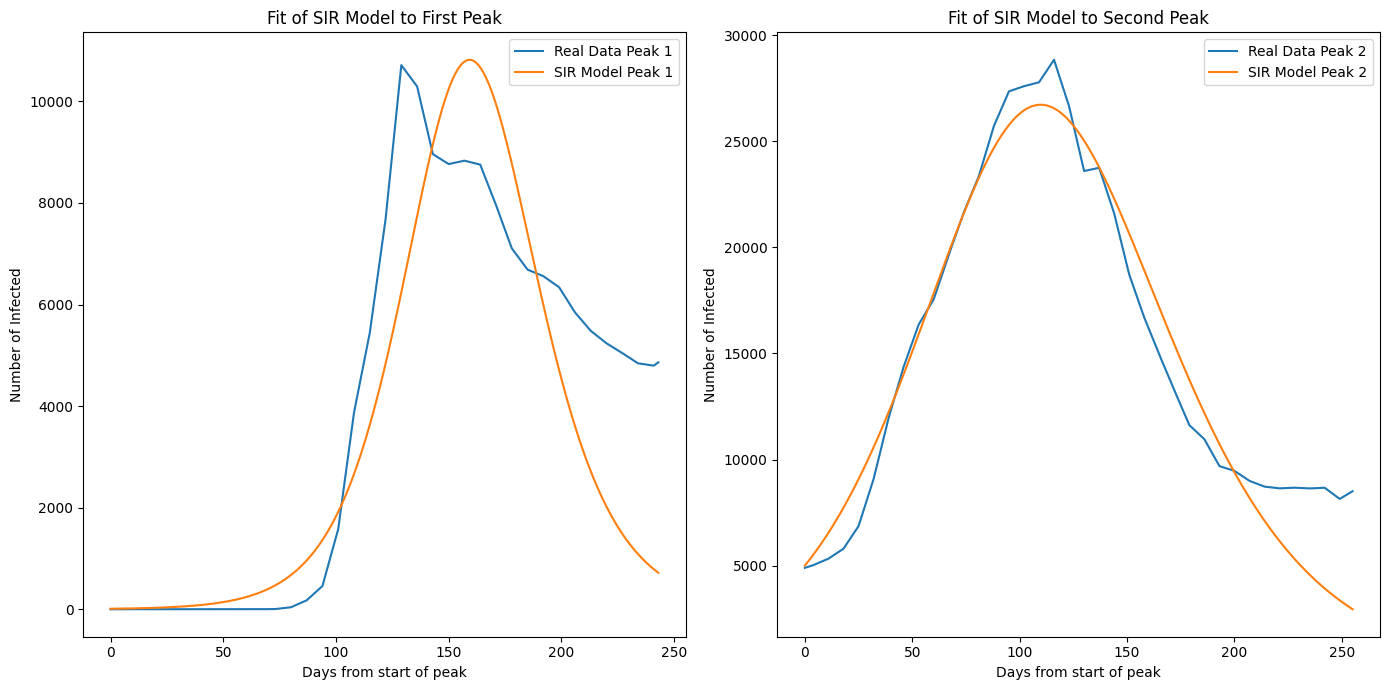

In [ ]:
# Определяем интервалы вокруг каждого пика
# Находим середину между двумя пиками
mid_point = peaks[0] + (peaks[1] - peaks[0]) // 2

# Разделяем данные на два интервала
peak_intervals = [(0, mid_point), (mid_point, len(smoothed_cases))]

# Извлекаем данные для каждого интервала
peak_data = [smoothed_cases[start:end] for start, end in peak_intervals]

# Начальные условия для модели SIR, для примера возьмем:
N = 1000000  # Примерная численность населения России
I0_peak1 = 10 # начальное количество инфицированных в первом пике
I0_peak2 = 5000  # начальное количество инфицированных во втором пике
S0 = N - I0_peak1 - I0_peak2  # предполагаем, что все остальные восприимчивы
R0 = 0  # предположим, что в начале никто не выздоровел

# Начальные условия для каждого пика
initial_conditions_peak1 = [S0, I0_peak1, R0]
initial_conditions_peak2 = [S0, I0_peak2, R0]

# Начальные предположения для параметров модели
beta_guess = 0.1
gamma_guess = 0.1

# Оптимизация для первого пика
optimal_peak1 = minimize(objective_function, [beta_guess, gamma_guess],
                         args=(initial_conditions_peak1, np.arange(len(peak_data[0])), peak_data[0].values, N), method='L-BFGS-B', bounds=[(0.0001, 1), (0.0001, 1)])

# Получаем оптимальные параметры для первого пика
beta_optimal_peak1, gamma_optimal_peak1 = optimal_peak1.x
print(optimal_peak1.x)

# Решаем SIR модель для первого пика
solution_peak1 = odeint(SIR_model, initial_conditions_peak1, np.arange(len(peak_data[0])),
                        args=(N, beta_optimal_peak1, gamma_optimal_peak1))

# Оптимизация для второго пика
optimal_peak2 = minimize(objective_function, [beta_guess, gamma_guess],
                         args=(initial_conditions_peak2, np.arange(len(peak_data[1])), peak_data[1].values, N),
                         method='L-BFGS-B', bounds=[(0.0001, 1), (0.0001, 1)])

# Получаем оптимальные параметры для второго пика
beta_optimal_peak2, gamma_optimal_peak2 = optimal_peak2.x
print(optimal_peak2.x)

# Решаем SIR модель для второго пика
solution_peak2 = odeint(SIR_model, initial_conditions_peak2, np.arange(len(peak_data[1])),
                        args=(N, beta_optimal_peak2, gamma_optimal_peak2))

# Визуализация решений для обоих пиков
plt.figure(figsize=(14, 7))

# Первый пик
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(peak_data[0])), peak_data[0], label='Real Data Peak 1')
plt.plot(np.arange(len(peak_data[0])), solution_peak1[:, 1], label='SIR Model Peak 1')
plt.title('Fit of SIR Model to First Peak')
plt.xlabel('Days from start of peak')
plt.ylabel('Number of Infected')
plt.legend()

# Второй пик
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(peak_data[1])), peak_data[1], label='Real Data Peak 2')
plt.plot(np.arange(len(peak_data[1])), solution_peak2[:, 1], label='SIR Model Peak 2')
plt.title('Fit of SIR Model to Second Peak')
plt.xlabel('Days from start of peak')
plt.ylabel('Number of Infected')
plt.legend()

plt.tight_layout()
plt.show()

### Использование более сложной модели (29.04.24)

In [ ]:
# Функция для описания изменений в системе
def model(y, t, phi, mu, c_0, beta, theta, eta, gamma_I, gamma_A, gamma_H, d, epsilon, q_1, q_2, q_3, sigma):
    S, E, I, A, Si, Q, H, R, Rh, D, T = y
    N = S + E + I + A + Si + Q + H + R + Rh + D + T

    dSdt = -beta * c_0 * (I + epsilon * A) * S / N - q_3 * (q_2 * I + eta * Q) * S / N + mu * Si
    dEdt = beta * c_0 * (I + epsilon * A) * S / N - phi * E - q_3 * (q_2 * I + eta * Q) * E / N
    dIdt = phi * E - gamma_I * I - d * I - q_2 * I - q_3 * (q_2 * I + eta * Q) * I / N
    dAdt = (1 - theta) * phi * E - gamma_A * A - q_3 * (q_2 * I + eta * Q) * A / N
    dSidt = q_3 * (q_2 * I + eta * Q) * S / N - mu * Si
    dQdt = q_3 * (q_2 * I + eta * Q) * (E + I + A) / N - eta * Q
    dHdt = q_2 * I + eta * Q - d * H - gamma_H * H
    dRdt = gamma_I * I + gamma_A * A + gamma_H * H
    dRhdt = gamma_H * H
    dDdt = d * (I + H)
    dTdt = q_2 * I + eta * Q

    return [dSdt, dEdt, dIdt, dAdt, dSidt, dQdt, dHdt, dRdt, dRhdt, dDdt, dTdt]

In [ ]:
def objective_function(params, initial_conditions, t, real_data):
    # Рассчитываем предсказания модели
    solution = odeint(model, initial_conditions, t, args=tuple(params))

    # Рассчитываем ошибку модели (например, сумму квадратов отклонений от наблюдаемых новых случаев)
    model_error = np.sum((solution[:, 2] - real_data) ** 2)  # Индекс 2 соответствует I(t)

    return model_error

In [ ]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
country_data = data[data['location'] == 'Russia']

In [ ]:
days_count = 300

cases = country_data['new_cases_smoothed'].fillna(0).values
smoothed_cases = pd.Series(cases).rolling(window=7, center=True).mean().fillna(0)

start_index = np.where(smoothed_cases > 0)[0][0]

# Временной интервал в днях
smoothed_cases = smoothed_cases[start_index:start_index + days_count]
t = np.arange(start_index, start_index + days_count)

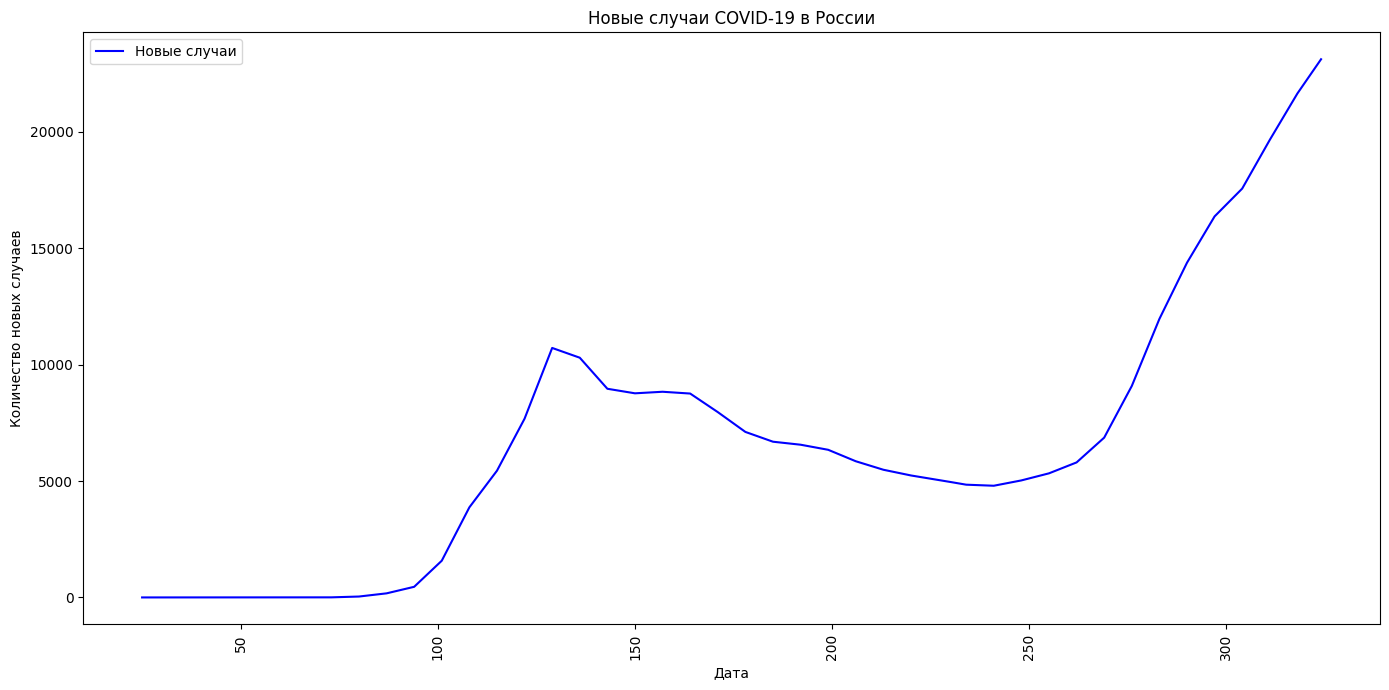

In [ ]:
# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(t, smoothed_cases, label='Новые случаи', color='blue')
plt.xticks(rotation=90)
plt.title('Новые случаи COVID-19 в России')
plt.xlabel('Дата')
plt.ylabel('Количество новых случаев')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
N = 15000000  # Общее население
initial_conditions = [
    N,          # S(t) - Уязвимые
    0,          # E(t) - Зараженные в стадии инкубационного периода
    10,         # I(t) - Симптомные больные
    10,         # A(t) - Бессимптомные больные
    0,          # Si(t) - Изолированные уязвимые
    0,          # Q(t) - Зараженные на карантине
    0,          # H(t) - Госпитализированные зараженные
    0,          # R(t) - Выздоровевшие
    0,          # Rh(t) - Выздоровевшие из госпиталя
    0,          # D(t) - Кумулятивное число смертей в госпитале
    0           # T(t) - Общее число подтвержденных случаев
]

# Параметры для оптимизации
initial_params = [
    (1/15 + 1/4) / 3,    # phi
    (0 + 1/6) / 3,       # mu
    (30 + 45) / 3,       # c_0
    (0.05 + 0.6) / 3,    # beta
    (0.35 + 0.8) / 3,    # theta
    (0 + 1) / 3,         # eta
    (0 + 1) / 3,         # gamma_I
    (0 + 1) / 3,         # gamma_A
    (0 + 1) / 3,         # gamma_H
    (0.001 + 0.15) / 3,  # d
    (0.6 + 0.9) / 3,     # epsilon
    (0.1 + 0.9) / 3,     # q_1
    (0.1 + 0.9) / 3,     # q_2
    (0 + 30) / 3,        # q_3
    (0 + 0.001) / 3      # sigma
]

# Определение границ для параметров
bounds = [
    (1/15, 1/4),  # phi
    (0, 1/6),     # mu
    (30, 45),     # c_0
    (0.05, 0.6),  # beta
    (0.35, 0.8),  # theta
    (0, 1),       # eta
    (0, 1),       # gamma_I
    (0, 1),       # gamma_A
    (0, 1),       # gamma_H
    (0.001, 0.15),# d
    (0.6, 0.9),   # epsilon
    (0.1, 0.9),   # q_1
    (0.1, 0.9),   # q_2
    (0, 30),      # q_3
    (0, 0.001)    # sigma
]


# Оптимизация параметров модели
result = minimize(
    objective_function,
    initial_params,
    args=(initial_conditions, t, smoothed_cases),
    method='L-BFGS-B',
    bounds=bounds
)

In [ ]:
# Проверяем статус сходимости
if result.success:
    # Оптимизация успешно сходится
    print("Оптимизация успешно завершена.")
    print("Оптимизированные параметры:", result.x)
    print("Количество итераций:", result.nit)
else:
    # Оптимизация не сходится
    print("Оптимизация не завершилась успешно.")
    print("Причина:", result.message)

Оптимизация успешно завершена.
Оптимизированные параметры: [6.66666667e-02 6.14528926e-02 3.00014730e+01 1.36577611e-01
 7.92538072e-01 9.63414097e-01 9.62287780e-01 9.82370697e-01
 0.00000000e+00 1.42541708e-01 6.08442331e-01 3.33333333e-01
 8.61501086e-01 2.89210724e+01 3.33333333e-04]
Количество итераций: 31


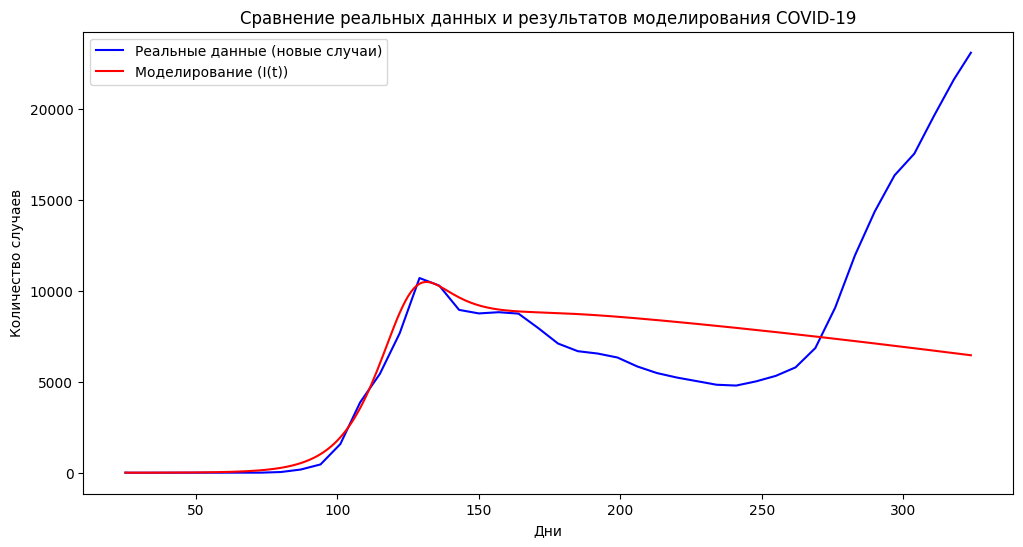

In [ ]:
optimized_solution = odeint(model, initial_conditions, t, args=tuple(result.x))
optimized_I = optimized_solution[:, 2]  # Извлекаем данные по симптоматически инфицированным

plt.figure(figsize=(12, 6))
plt.plot(t, smoothed_cases, 'b', label='Реальные данные (новые случаи)')
plt.plot(t, optimized_I, 'r', label='Моделирование (I(t))')
plt.xlabel('Дни')
plt.ylabel('Количество случаев')
plt.title('Сравнение реальных данных и результатов моделирования COVID-19')
plt.legend()
plt.show()

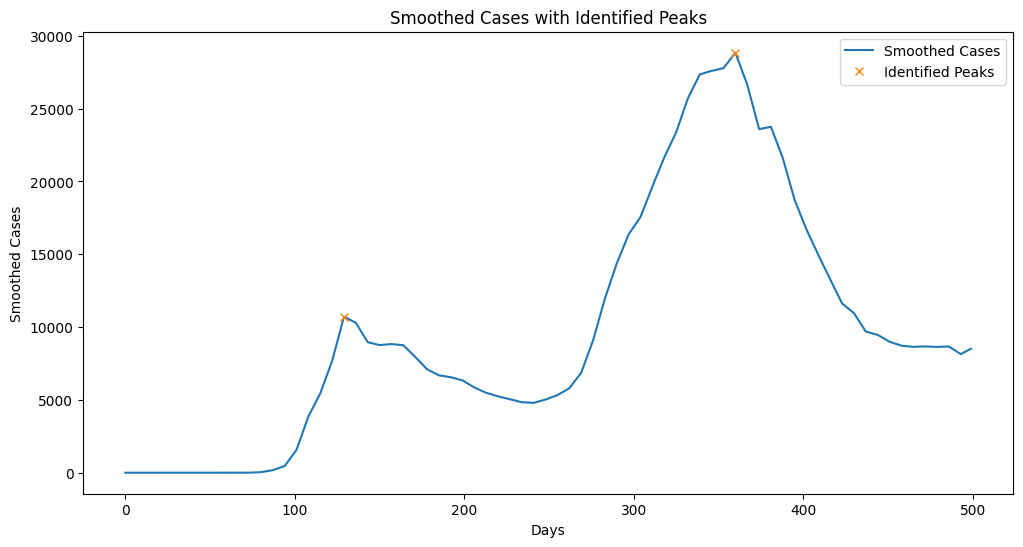

In [ ]:
from scipy.signal import find_peaks

days_count = 500

cases = country_data['new_cases_smoothed'].fillna(0).values
smoothed_cases = pd.Series(cases).rolling(window=7, center=True).mean().fillna(0)

start_index = 0

# Временной интервал в днях
smoothed_cases = smoothed_cases[start_index:start_index + days_count]
t = np.arange(start_index, start_index + days_count)

# Определение пиков в сглаженных данных о случаях заболевания
peaks, properties = find_peaks(smoothed_cases, height=np.max(smoothed_cases)/3, distance=200)

# Визуализация данных и пиков
plt.figure(figsize=(12, 6))
plt.plot(smoothed_cases, label='Smoothed Cases')
plt.plot(peaks, smoothed_cases.iloc[peaks], "x", label='Identified Peaks')
plt.title('Smoothed Cases with Identified Peaks')
plt.xlabel('Days')
plt.ylabel('Smoothed Cases')
plt.legend()
plt.show()

In [ ]:
# Определяем интервалы вокруг каждого пика
# Находим середину между двумя пиками
mid_point = peaks[0] + (peaks[1] - peaks[0]) // 2

print(mid_point)

# Разделяем данные на два интервала
peak_intervals = [(0, mid_point + 5), (mid_point - 5, len(smoothed_cases))]

print(peak_intervals)

# Извлекаем данные для каждого интервала
peak_data = [smoothed_cases[start:end] for start, end in peak_intervals]

# Начальные условия для каждого пика
N = 14000000  # Общее население
initial_conditions_peak1  = [
    N,          # S(t) - Уязвимые
    0,          # E(t) - Зараженные в стадии инкубационного периода
    10,         # I(t) - Симптомные больные
    10,         # A(t) - Бессимптомные больные
    0,          # Si(t) - Изолированные уязвимые
    0,          # Q(t) - Зараженные на карантине
    0,          # H(t) - Госпитализированные зараженные
    0,          # R(t) - Выздоровевшие
    0,          # Rh(t) - Выздоровевшие из госпиталя
    0,          # D(t) - Кумулятивное число смертей в госпитале
    0           # T(t) - Общее число подтвержденных случаев
]

# Параметры для оптимизации
initial_params = [
    (1/15 + 1/4) / 3,    # phi
    (0 + 1/6) / 3,       # mu
    (30 + 45) / 3,       # c_0
    (0.05 + 0.6) / 3,    # beta
    (0.35 + 0.8) / 3,    # theta
    (0 + 1) / 3,         # eta
    (0 + 1) / 3,         # gamma_I
    (0 + 1) / 3,         # gamma_A
    (0 + 1) / 3,         # gamma_H
    (0.001 + 0.15) / 3,  # d
    (0.6 + 0.9) / 3,     # epsilon
    (0.1 + 0.9) / 3,     # q_1
    (0.1 + 0.9) / 3,     # q_2
    (0 + 30) / 3,        # q_3
    (0 + 0.001) / 3      # sigma
]

# Определение границ для параметров
bounds = [
    (1/15, 1/4),  # phi
    (0, 1/6),     # mu
    (30, 45),     # c_0
    (0.05, 0.6),  # beta
    (0.35, 0.8),  # theta
    (0, 1),       # eta
    (0, 1),       # gamma_I
    (0, 1),       # gamma_A
    (0, 1),       # gamma_H
    (0.001, 0.15),# d
    (0.6, 0.9),   # epsilon
    (0.1, 0.9),   # q_1
    (0.1, 0.9),   # q_2
    (0, 30),      # q_3
    (0, 0.001)    # sigma
]

244
[(0, 249), (239, 500)]


In [ ]:
# Оптимизация для первого пика
optimal_peak1 = minimize(objective_function, initial_params,
                         args=(initial_conditions_peak1, np.arange(len(peak_data[0])), peak_data[0].values),
                         method='L-BFGS-B', bounds=bounds)

# Решаем SIR модель для первого пика
solution_peak1 = odeint(model, initial_conditions_peak1, np.arange(len(peak_data[0])), args=tuple(optimal_peak1.x))

# Решение для первого пика (коэффициенты)
solution_peak1_params = optimal_peak1.x
print(solution_peak1_params)

# Получаем конечные условия первого пика как начальные для второго
initial_conditions_peak2 = solution_peak1[-1].tolist()
print(initial_conditions_peak2)

[1.73046093e-01 1.06007768e-01 3.00000167e+01 7.93284703e-02
 7.85155236e-01 9.39686085e-01 9.71482935e-01 9.65059283e-01
 1.11721475e-02 1.45997633e-01 6.00396033e-01 3.33333333e-01
 8.95507610e-01 2.99279037e+01 3.33333333e-04]
[10614340.372482369, 55635.69314794891, 4777.031081446272, 2137.90339293012, 1010544.3773247167, 628.4069897071603, 32606.85155989227, 1543441.163515222, 79594.95443045947, 1192876.574359533, 1152348.73453446]


In [ ]:
# Оптимизация для второго пика
optimal_peak2 = minimize(objective_function, solution_peak1_params,
                         args=(initial_conditions_peak2, np.arange(len(peak_data[1])), peak_data[1].values),
                         method='L-BFGS-B', bounds=bounds)

print(optimal_peak2.x)

# Решаем SIR модель для второго пика
solution_peak2 = odeint(model, initial_conditions_peak2, np.arange(len(peak_data[1])), args=tuple(optimal_peak2.x))

[6.66666667e-02 2.05989093e-02 3.68814185e+01 5.00000000e-02
 8.00000000e-01 6.95122095e-02 8.58552469e-01 4.47018764e-01
 7.29374371e-10 1.42919652e-01 6.00000001e-01 3.33333333e-01
 1.03213522e-01 1.61194343e+01 3.33333333e-04]


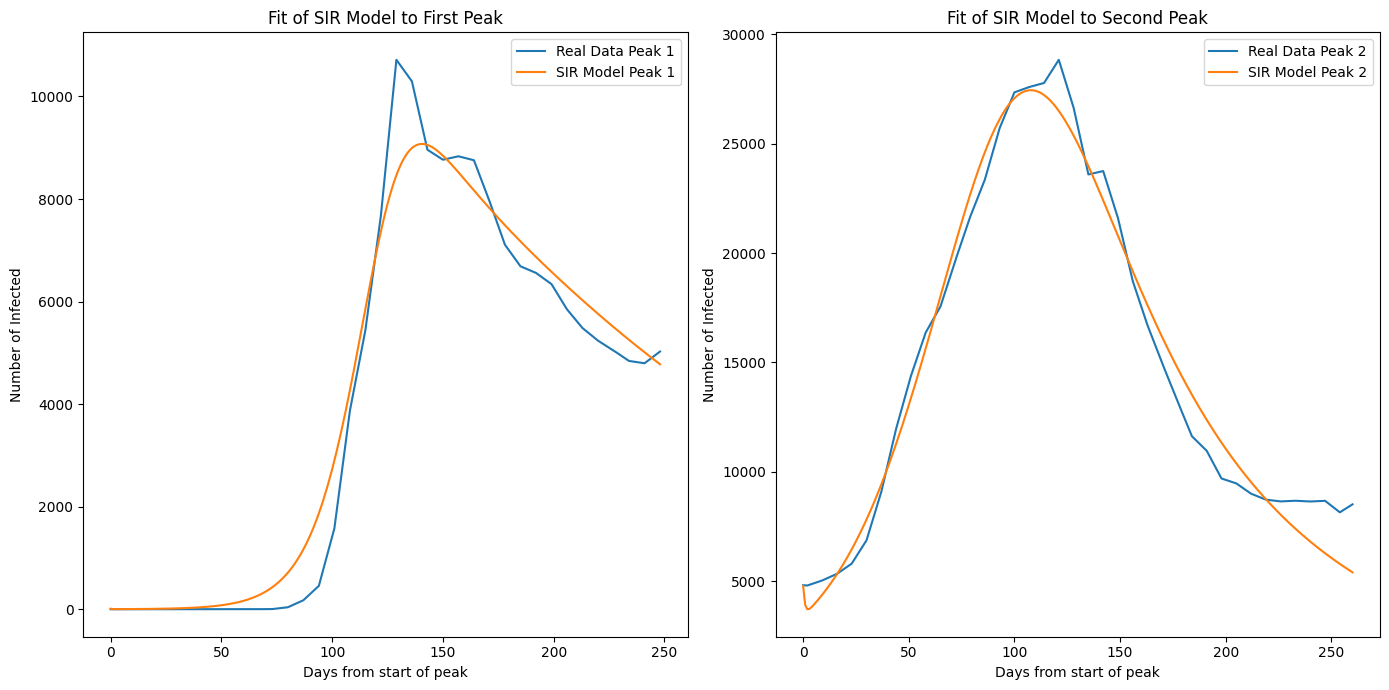

In [ ]:
# Визуализация решений для обоих пиков
plt.figure(figsize=(14, 7))

# Первый пик
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(peak_data[0])), peak_data[0], label='Real Data Peak 1')
plt.plot(np.arange(len(peak_data[0])), solution_peak1[:, 2], label='SIR Model Peak 1')
plt.title('Fit of SIR Model to First Peak')
plt.xlabel('Days from start of peak')
plt.ylabel('Number of Infected')
plt.legend()

# Второй пик
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(peak_data[1])), peak_data[1], label='Real Data Peak 2')
plt.plot(np.arange(len(peak_data[1])), solution_peak2[:, 2], label='SIR Model Peak 2')
plt.title('Fit of SIR Model to Second Peak')
plt.xlabel('Days from start of peak')
plt.ylabel('Number of Infected')
plt.legend()

plt.tight_layout()
plt.show()